In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

jan_N = pd.read_csv('Data/North/N_01_extent_v3.0.csv')
jan_N

,year,mo,data-type,region,extent,area
0,1979,1,Goddard,N,15.41,12.41
1,1980,1,Goddard,N,14.86,11.94
2,1981,1,Goddard,N,14.91,11.91
3,1982,1,Goddard,N,15.18,12.19
4,1983,1,Goddard,N,14.94,12.01
5,1984,1,Goddard,N,14.47,11.68
6,1985,1,Goddard,N,14.72,11.69
7,1986,1,Goddard,N,14.89,11.88
8,1987,1,Goddard,N,14.97,11.90
9,1988,1,-9999,N,-9999.00,-9999.00


In [ ]:
import numpy as np

np.linspace(1,10)

array([ 1.        ,  1.18367347,  1.36734694,  1.55102041,  1.73469388,
        1.91836735,  2.10204082,  2.28571429,  2.46938776,  2.65306122,
        2.83673469,  3.02040816,  3.20408163,  3.3877551 ,  3.57142857,
        3.75510204,  3.93877551,  4.12244898,  4.30612245,  4.48979592,
        4.67346939,  4.85714286,  5.04081633,  5.2244898 ,  5.40816327,
        5.59183673,  5.7755102 ,  5.95918367,  6.14285714,  6.32653061,
        6.51020408,  6.69387755,  6.87755102,  7.06122449,  7.24489796,
        7.42857143,  7.6122449 ,  7.79591837,  7.97959184,  8.16326531,
        8.34693878,  8.53061224,  8.71428571,  8.89795918,  9.08163265,
        9.26530612,  9.44897959,  9.63265306,  9.81632653, 10.        ])

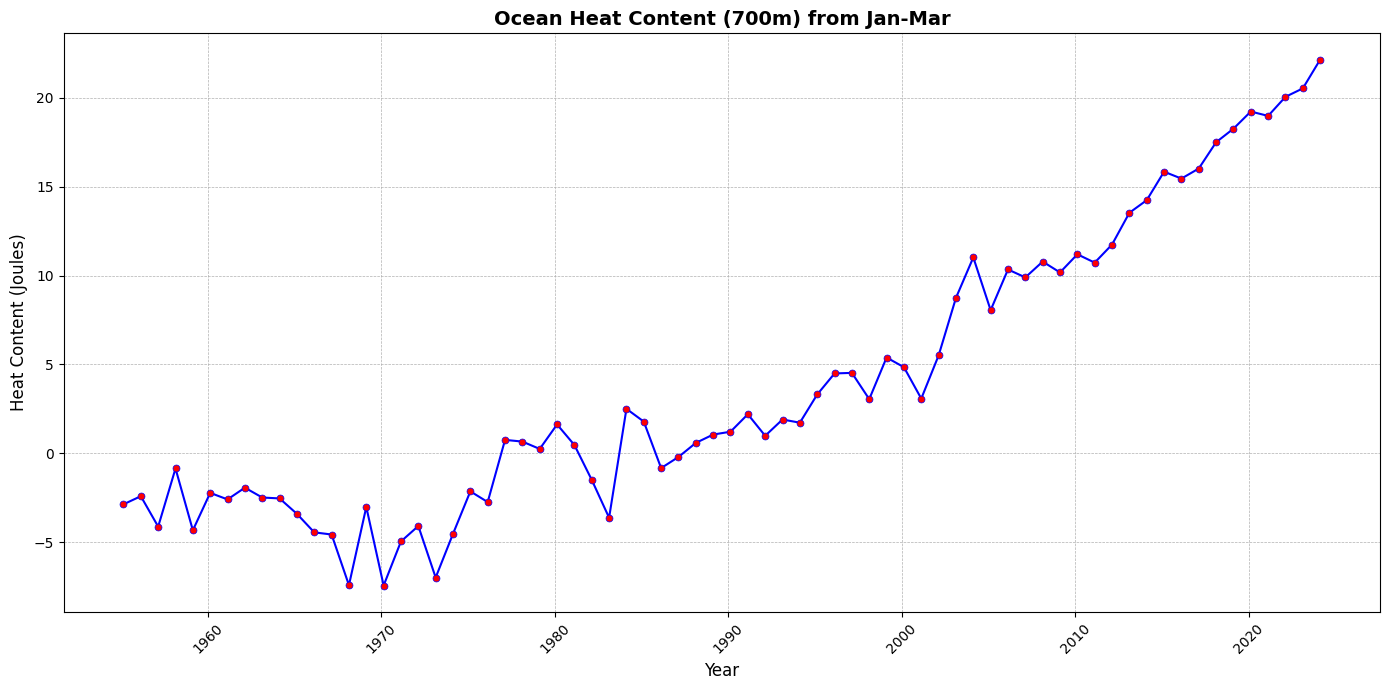

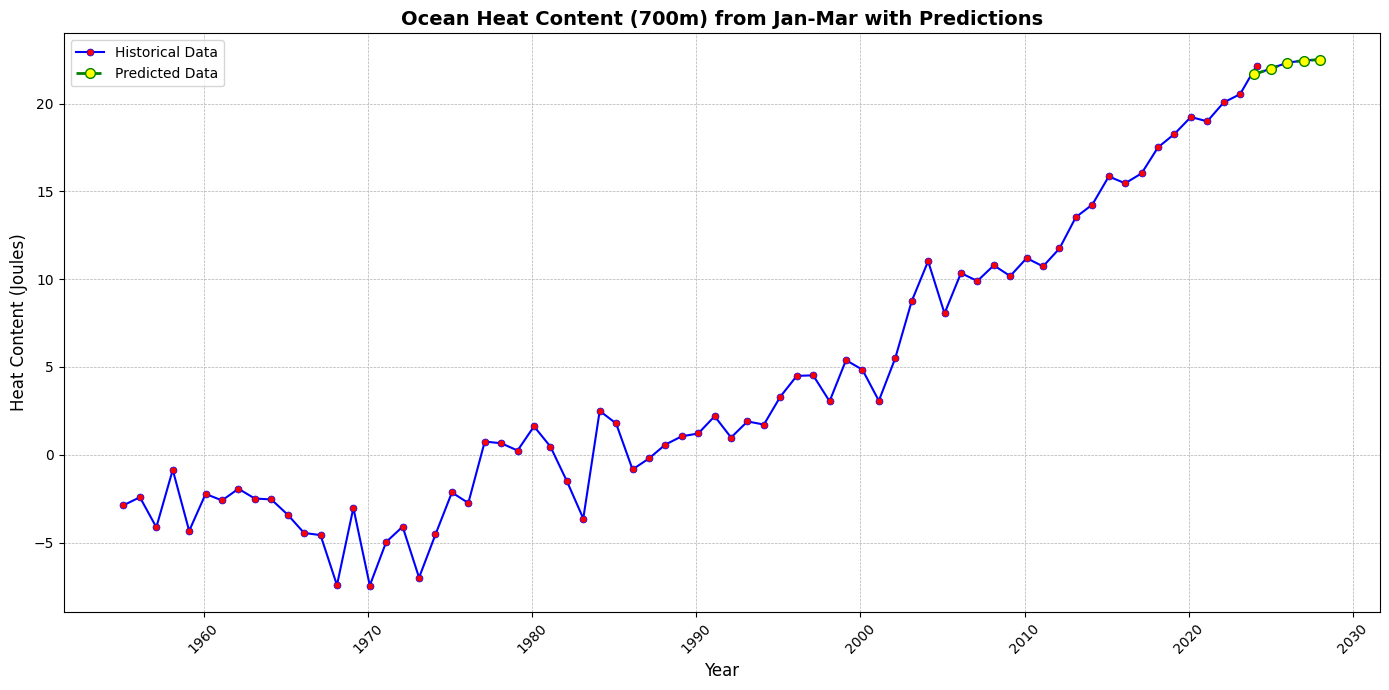

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import requests

# URL of the data file
url = "https://www.ncei.noaa.gov/data/oceans/woa/DATA_ANALYSIS/3M_HEAT_CONTENT/DATA/basin/3month/h22-w0-700m1-3.dat"

# Download the data
response = requests.get(url)
data_text = response.text

# Save the data to a local file
with open("ocean_heat_content_jan_mar.dat", "w") as file:
    file.write(data_text)

# Read the data into a pandas DataFrame
data = pd.read_csv("ocean_heat_content_jan_mar.dat", delim_whitespace=True)

# Extract the relevant columns
data = data[['YEAR', 'WO']].rename(columns={'YEAR': 'Year', 'WO': 'Heat_Content'})

# Plotting the historical data
plt.figure(figsize=(14, 7))
plt.plot(data['Year'], data['Heat_Content'], marker='o', linestyle='-', color='b', linewidth=1.5, markersize=5, markerfacecolor='red', markeredgewidth=0.5)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Heat Content (Joules)', fontsize=12)
plt.title('Ocean Heat Content (700m) from Jan-Mar', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Fit ARIMA model
model = ARIMA(data['Heat_Content'], order=(5, 1, 0))  # (p, d, q) order for ARIMA
model_fit = model.fit()

# Predict the next 5 years
future_years = list(range(2024, 2029))
forecast = model_fit.forecast(steps=5)

# Combine historical and predicted data
future_data = pd.DataFrame({'Year': future_years, 'Heat_Content': forecast})
combined_data = pd.concat([data, future_data])

# Plotting the historical and predicted data
plt.figure(figsize=(14, 7))
plt.plot(combined_data['Year'], combined_data['Heat_Content'], marker='o', linestyle='-', color='b', linewidth=1.5, markersize=5, markerfacecolor='red', markeredgewidth=0.5, label='Historical Data')
plt.plot(future_data['Year'], future_data['Heat_Content'], marker='o', linestyle='--', color='g', linewidth=2, markersize=7, markerfacecolor='yellow', markeredgewidth=1, label='Predicted Data')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Heat Content (Joules)', fontsize=12)
plt.title('Ocean Heat Content (700m) from Jan-Mar with Predictions', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Missing values:
 YEAR    0
WO      0
WOse    0
NH      0
NHse    0
SH      0
SHse    0
dtype: int64
Outliers detected:
 Empty DataFrame
Columns: [YEAR, WO, WOse, NH, NHse, SH, SHse]
Index: []
Summary Statistics:
               YEAR         WO       WOse         NH       NHse         SH  \
count    70.000000  70.000000  70.000000  70.000000  70.000000  70.000000   
mean   1989.625000   3.972686   1.223357   1.862014   0.477500   2.110729   
std      20.351085   7.940851   0.448409   3.986676   0.187056   4.164565   
min    1955.125000  -7.441000   0.512000  -4.531000   0.206000  -3.568000   
25%    1972.375000  -2.470500   0.720250  -1.460000   0.282250  -0.917500   
50%    1989.625000   1.672000   1.347500   1.147000   0.450500   0.858000   
75%    2006.875000  10.302250   1.608000   5.353750   0.614250   4.488250   
max    2024.125000  22.153000   2.019000   9.740000   0.910000  12.413000   

            SHse  WO_normalized  
count  70.000000      70.000000  
mean    0.745943       0.

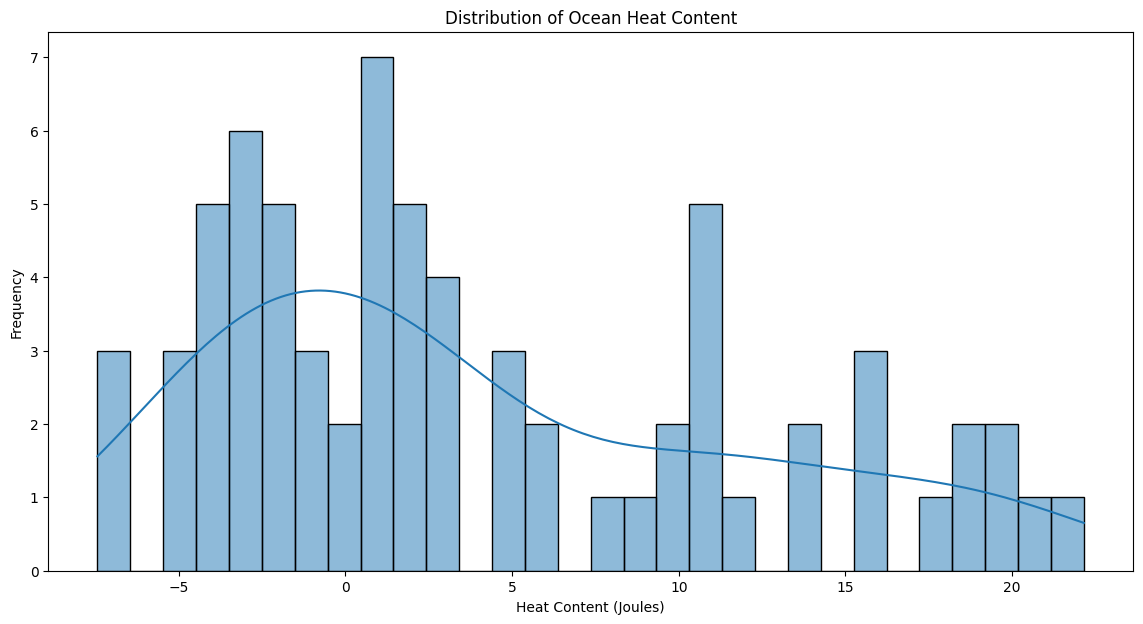

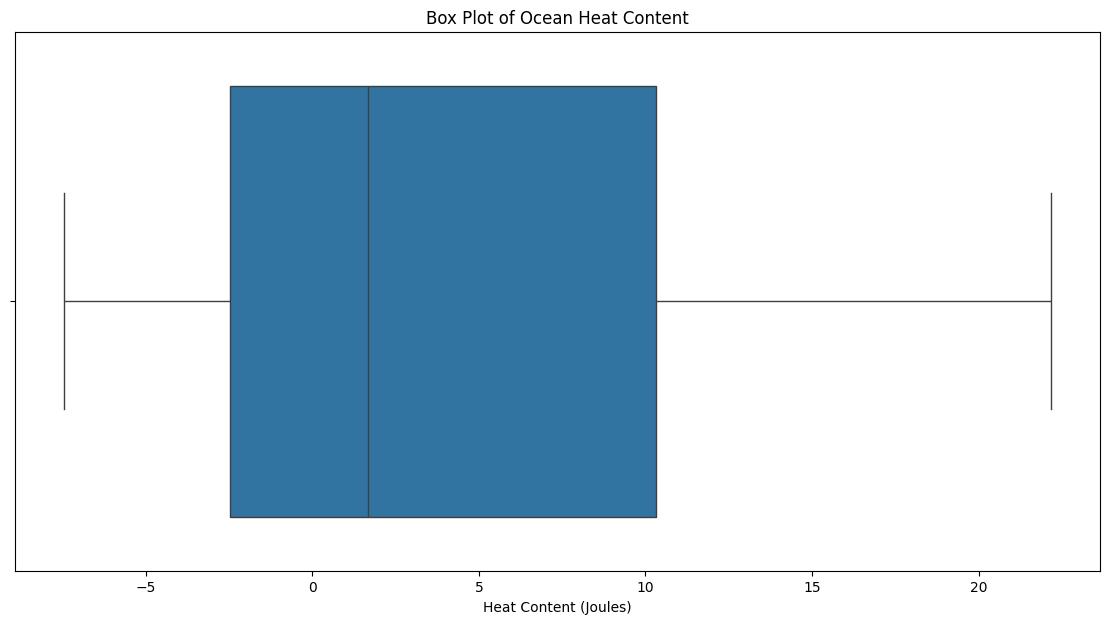

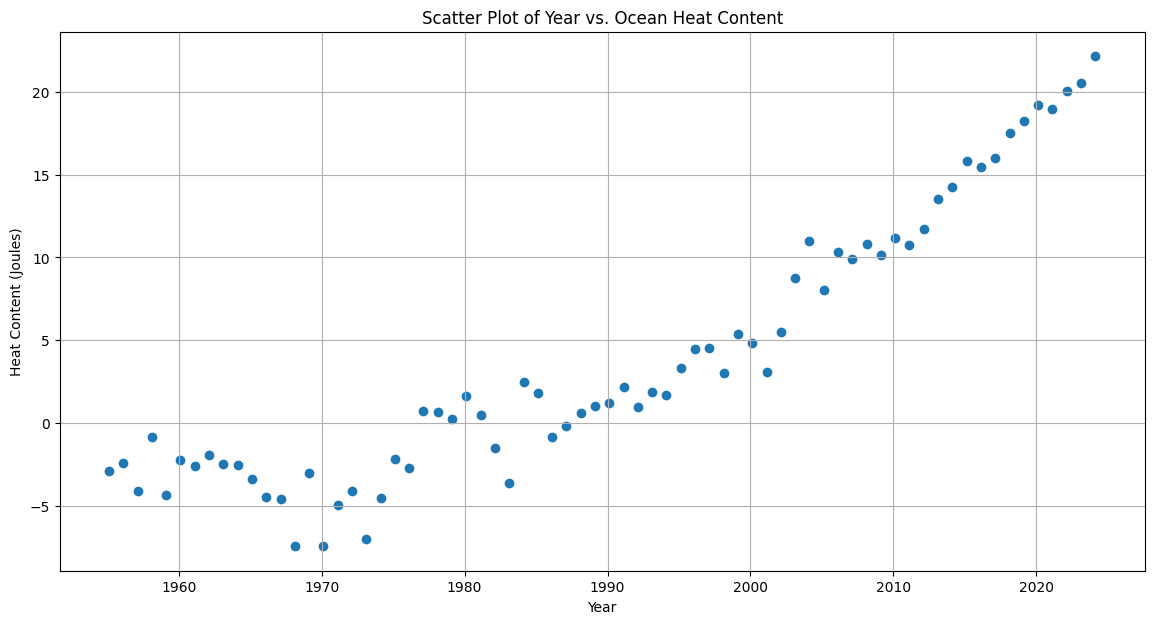

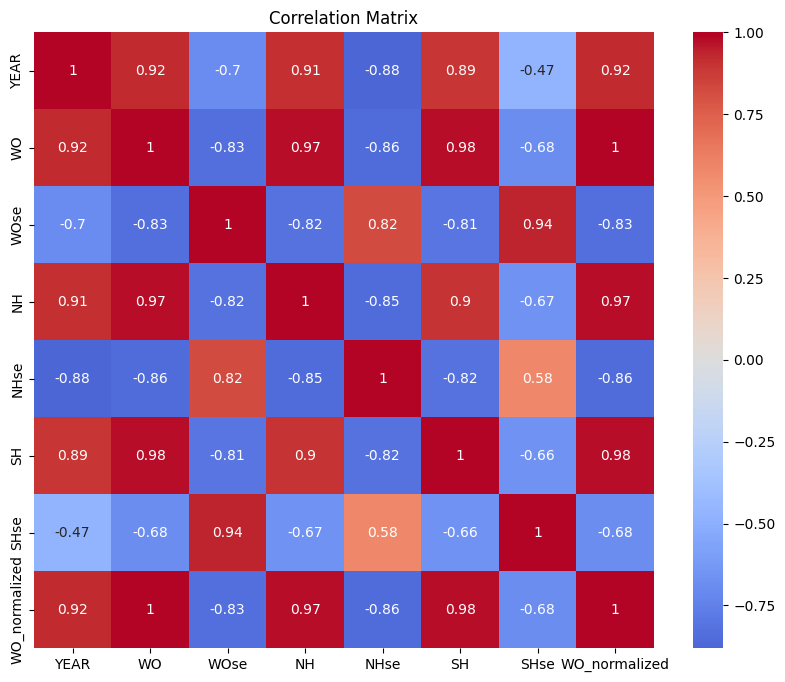

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import requests

# URL of the data file
url = "https://www.ncei.noaa.gov/data/oceans/woa/DATA_ANALYSIS/3M_HEAT_CONTENT/DATA/basin/3month/h22-w0-700m1-3.dat"

# Download the data
response = requests.get(url)
data_text = response.text

# Save the data to a local file
with open("ocean_heat_content_jan_mar.dat", "w") as file:
    file.write(data_text)

# Read the data into a pandas DataFrame
data = pd.read_csv("ocean_heat_content_jan_mar.dat", delim_whitespace=True)

# Data Cleaning Steps
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Handle missing values (if any)
data = data.dropna()  # or use data.fillna(method='ffill') to forward fill missing values

# Outlier Detection using Z-score
z_scores = np.abs(stats.zscore(data['WO']))
outliers = data[z_scores > 3]
print("Outliers detected:\n", outliers)

# Remove outliers
data_clean = data[(z_scores <= 3)]

# Data Transformation (Normalization)
data_clean['WO_normalized'] = (data_clean['WO'] - data_clean['WO'].min()) / (data_clean['WO'].max() - data_clean['WO'].min())

# Exploratory Data Analysis (EDA)
# Summary Statistics
summary_stats = data_clean.describe()
print("Summary Statistics:\n", summary_stats)

# Visualizations
plt.figure(figsize=(14, 7))
sns.histplot(data_clean['WO'], bins=30, kde=True)
plt.title('Distribution of Ocean Heat Content')
plt.xlabel('Heat Content (Joules)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x=data_clean['WO'])
plt.title('Box Plot of Ocean Heat Content')
plt.xlabel('Heat Content (Joules)')
plt.show()

# Scatter plot of Year vs. Heat Content
plt.figure(figsize=(14, 7))
plt.scatter(data_clean['YEAR'], data_clean['WO'])
plt.title('Scatter Plot of Year vs. Ocean Heat Content')
plt.xlabel('Year')
plt.ylabel('Heat Content (Joules)')
plt.grid(True)
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data_clean.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


IMPORTING AND CLEANING N/S DATA + PLOTTING AND PREDICTING USING LINEAR DATA


North Pole Data Columns: Index(['year', ' mo', '    data-type', ' region', ' extent', '   area'], dtype='object')
South Pole Data Columns: Index(['year', ' mo', '    data-type', ' region', ' extent', '   area'], dtype='object')
Cleaning North Pole Data:

Columns after stripping: Index(['year', 'mo', 'data-type', 'region', 'extent', 'area'], dtype='object')
Missing values:
 year    0
mo      0
area    0
dtype: int64
Original dataset shape: (546, 3)
Trimmed dataset shape: (543, 3)
Cleaned data saved to cleaned_north_pole_data.csv

Cleaning South Pole Data:

Columns after stripping: Index(['year', 'mo', 'data-type', 'region', 'extent', 'area'], dtype='object')
Missing values:
 year    0
mo      0
area    0
dtype: int64
Original dataset shape: (546, 3)
Trimmed dataset shape: (544, 3)
Cleaned data saved to cleaned_south_pole_data.csv

North Pole Summary Statistics by Month:
    Month       Mean  Median  Standard Deviation     IQR
0       1  12.186444  12.170            0.390478  0.4500
1  

<ipython-input-4-9edb5f0e102b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'] = df['area'].interpolate(method='linear', limit_direction='both')
<ipython-input-4-9edb5f0e102b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'] = df['area'].interpolate(method='linear', limit_direction='both')
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/py

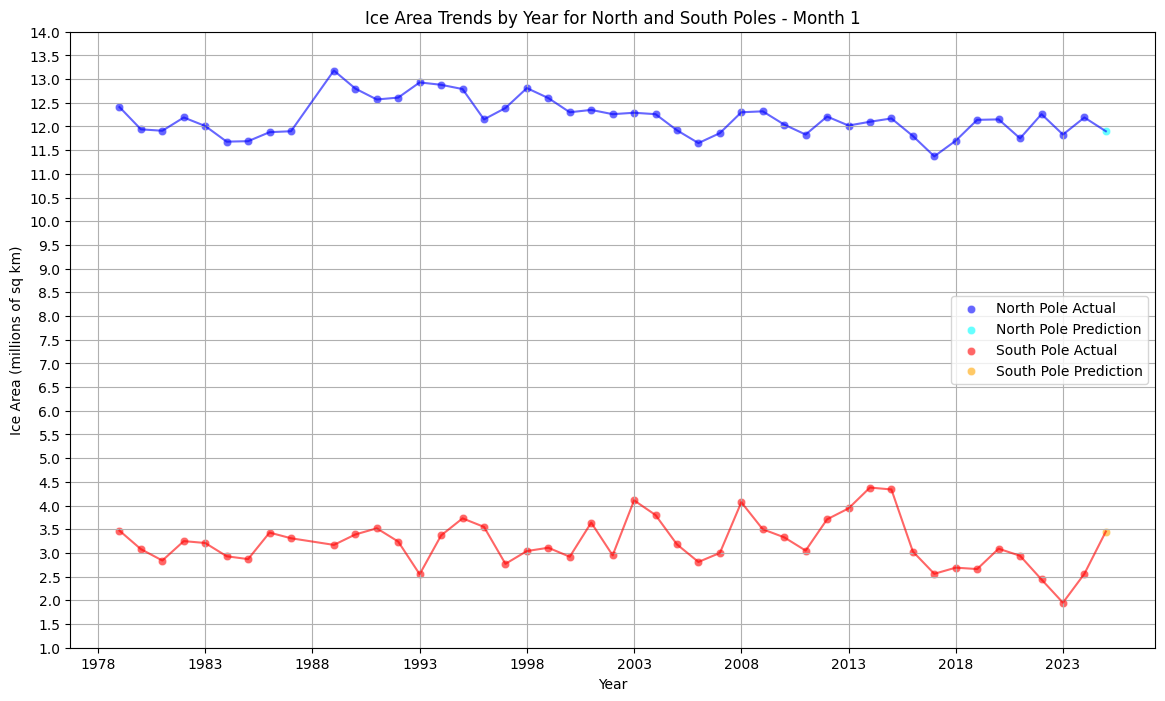

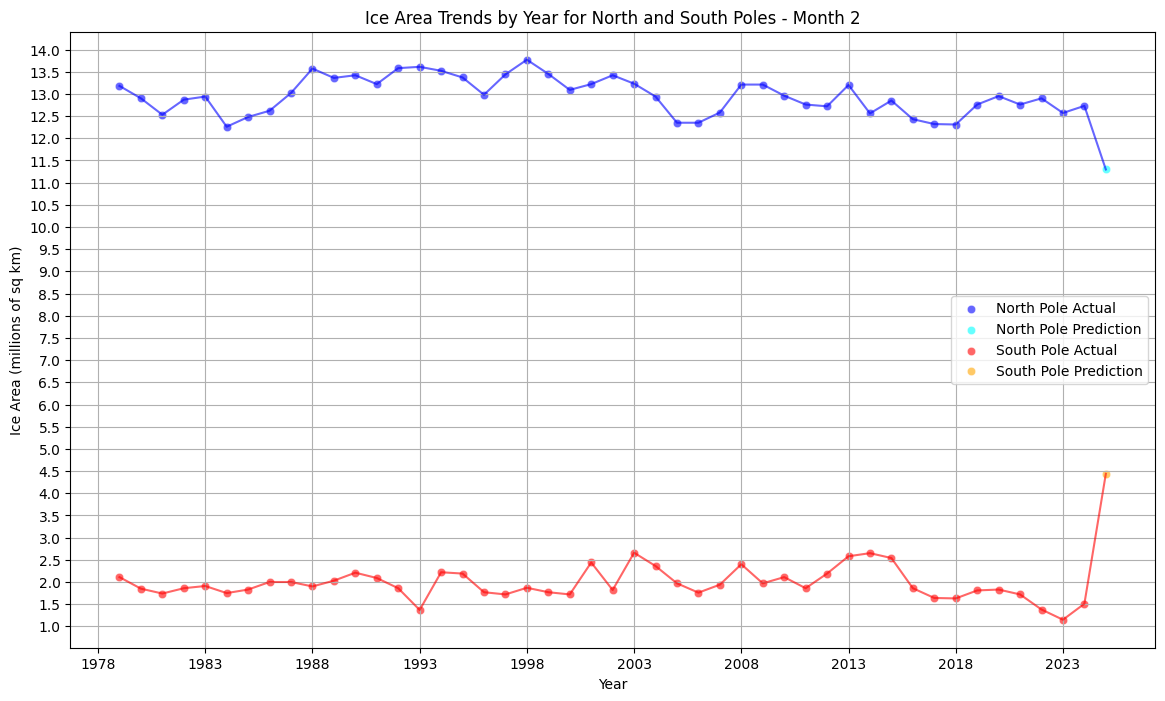

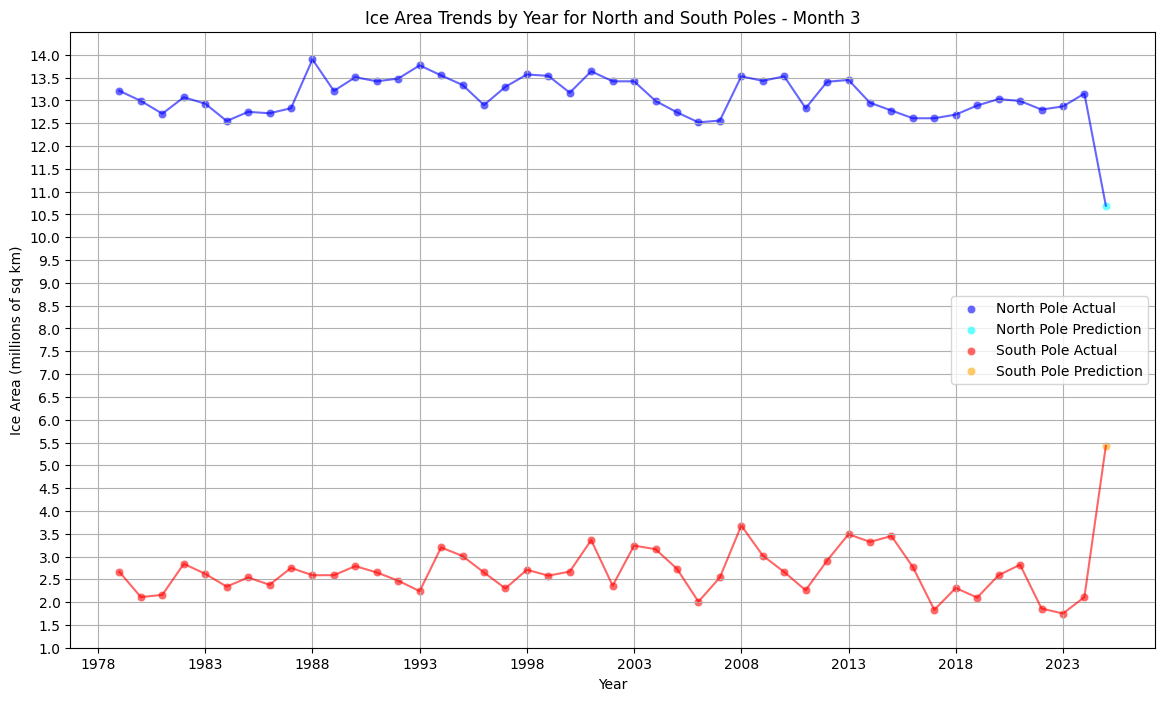

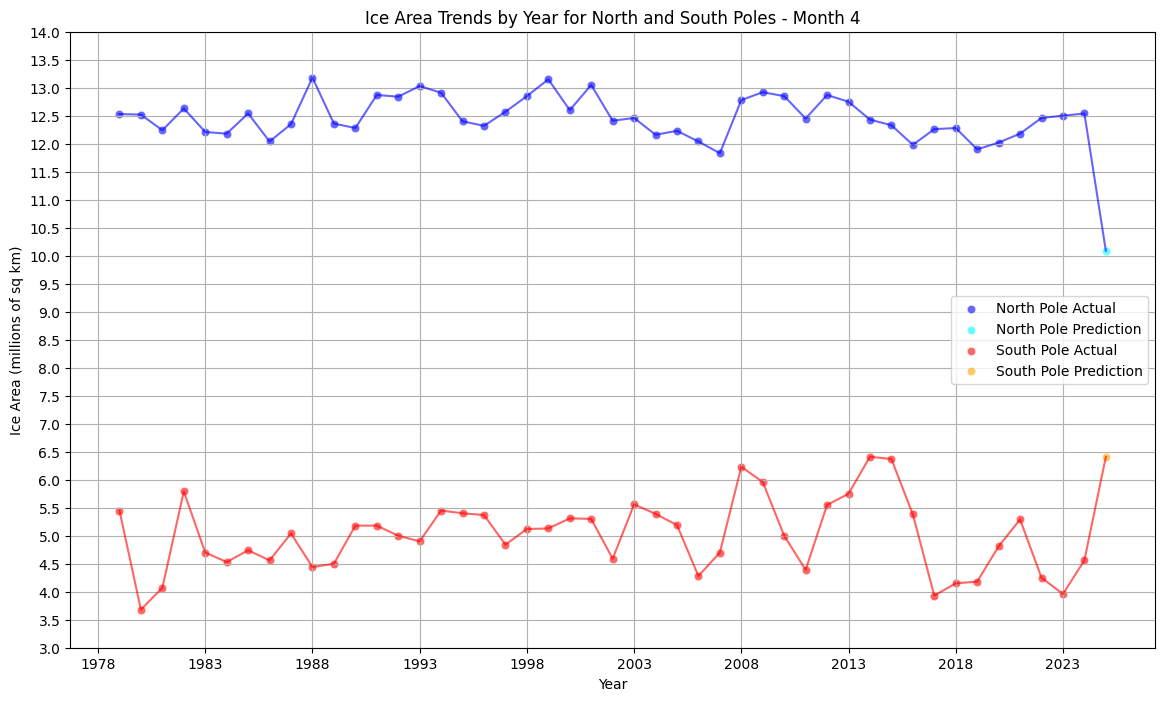

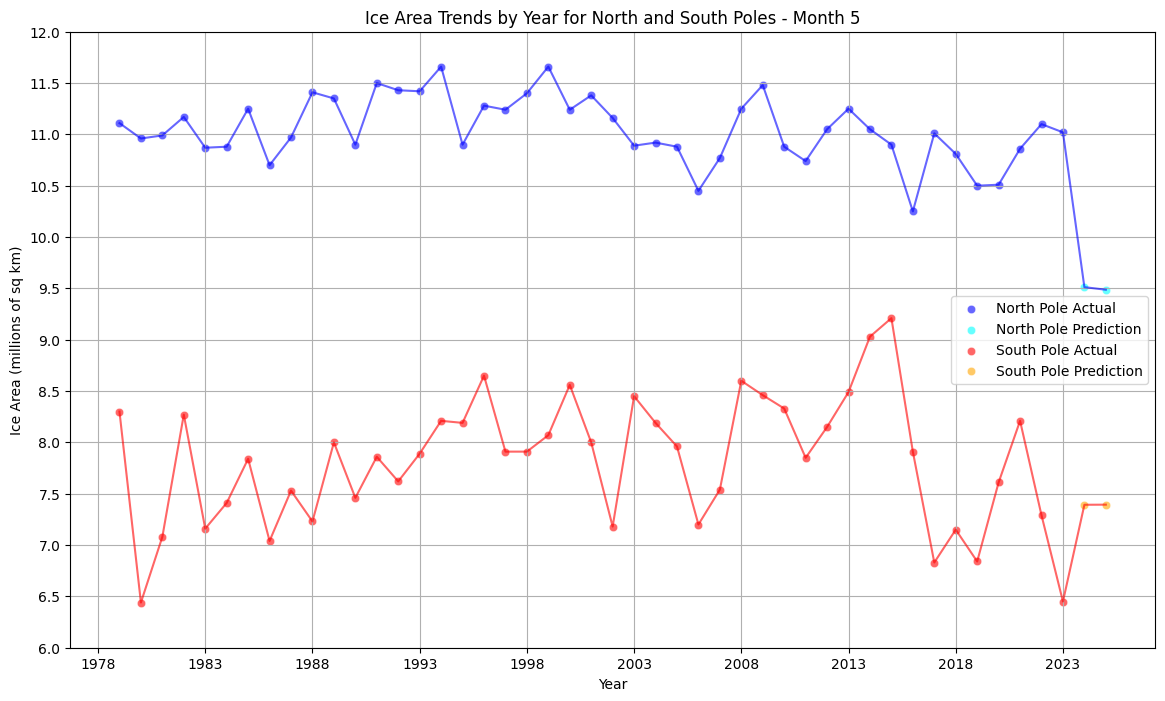

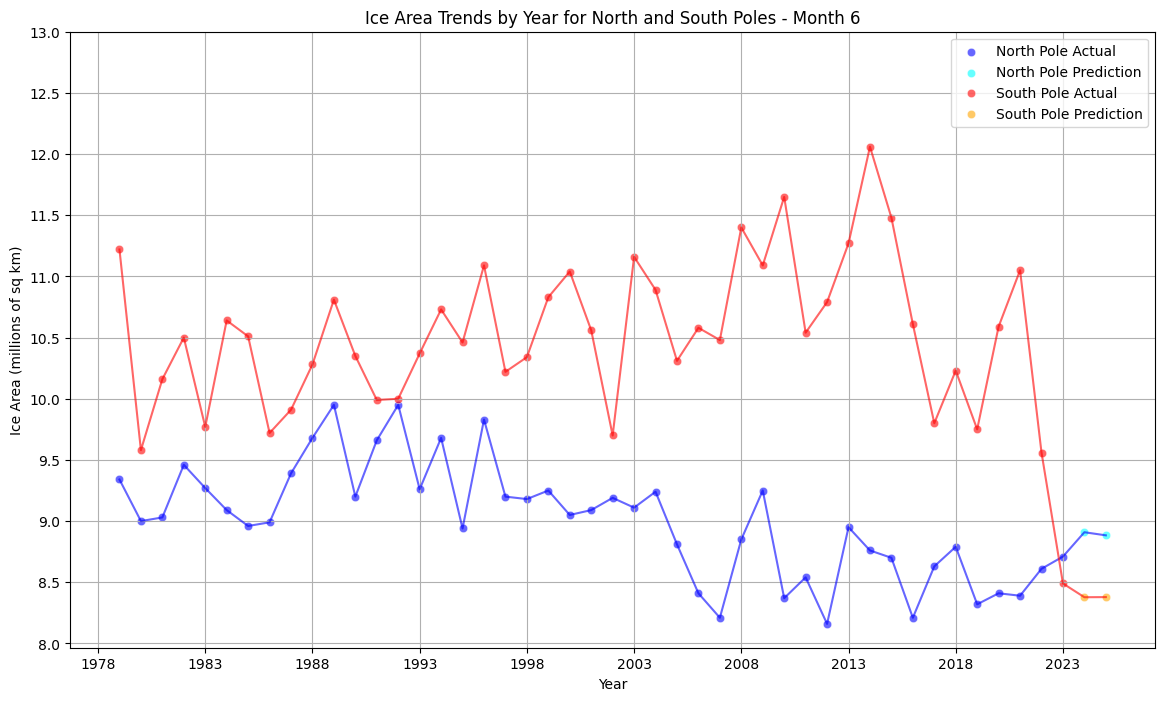

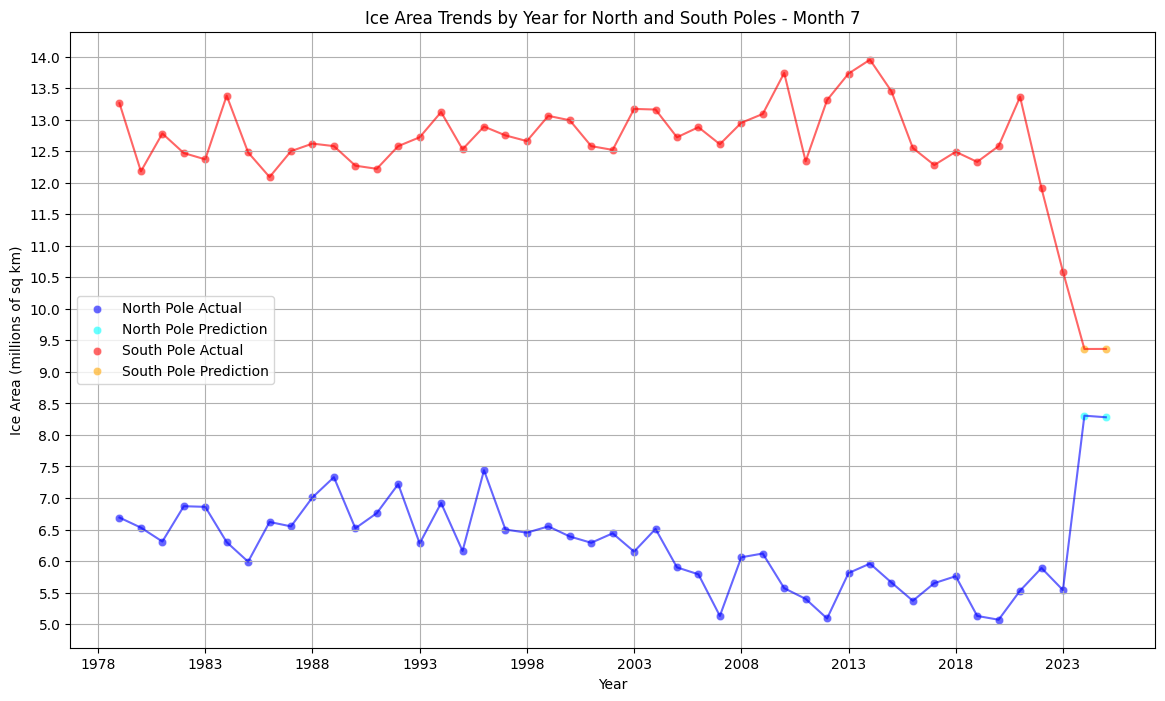

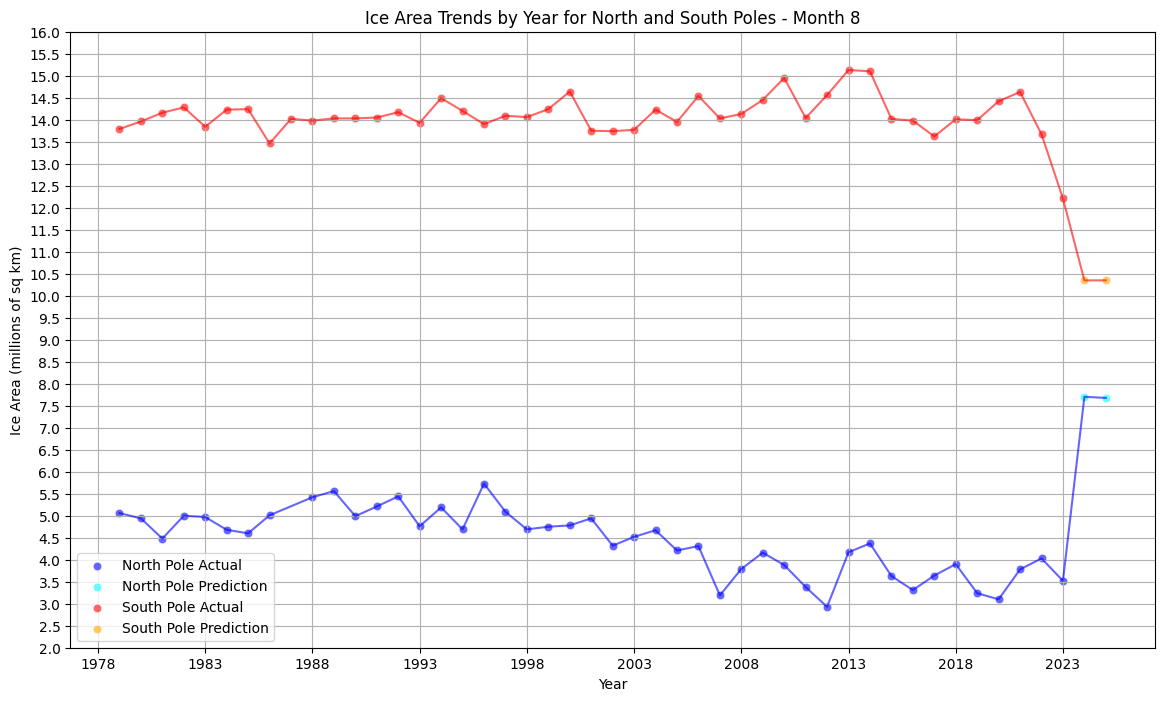

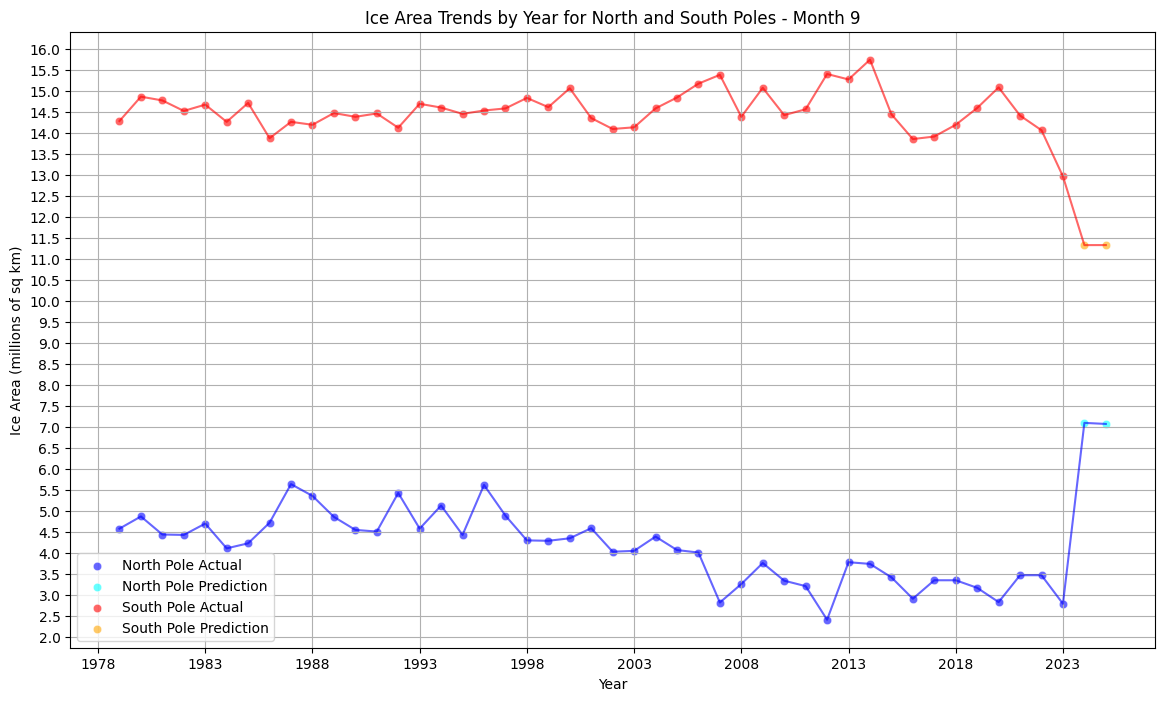

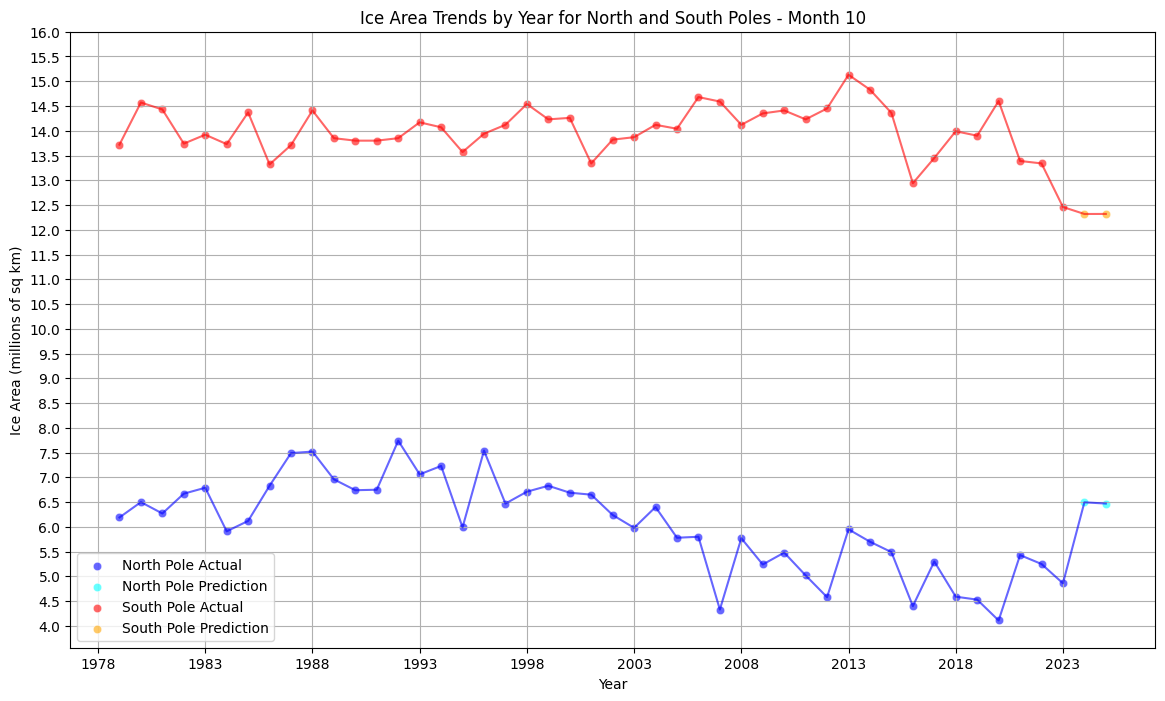

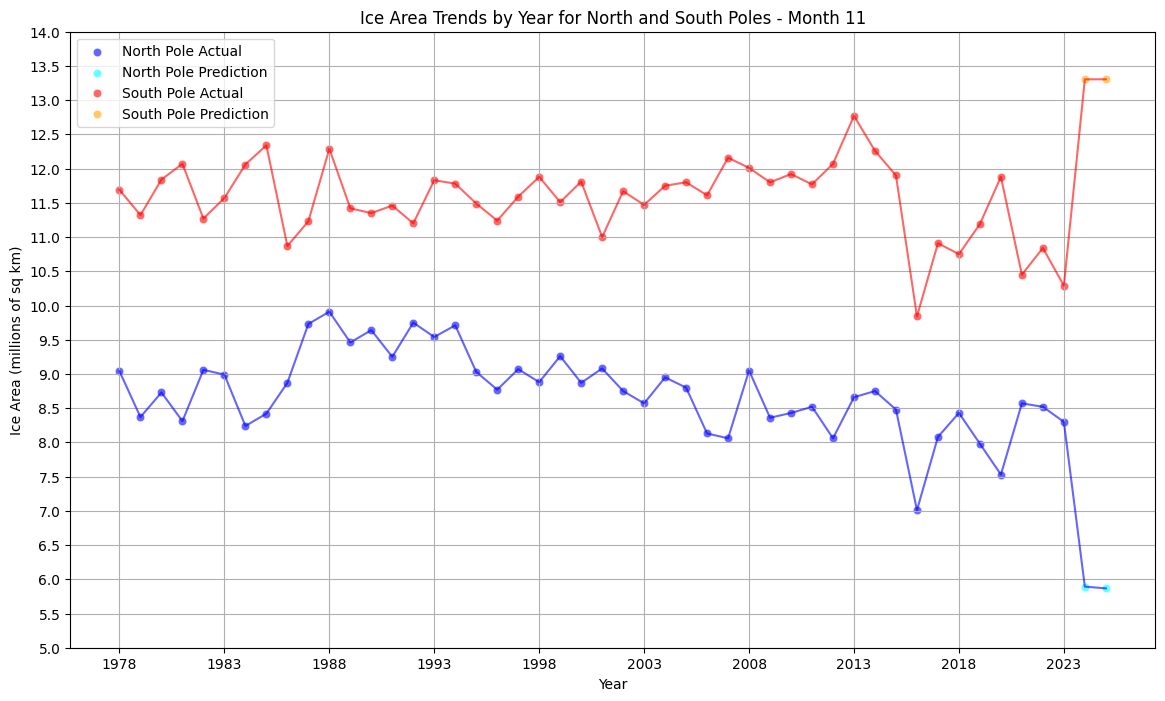

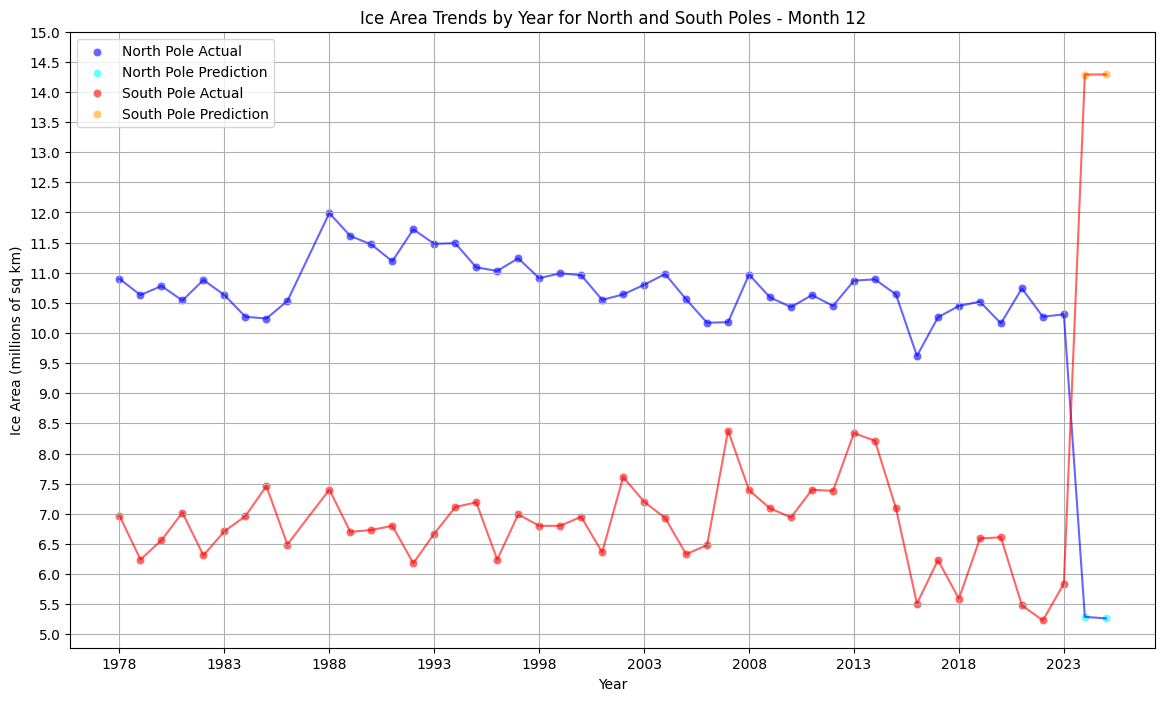

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

north_pole_url = 'https://drive.google.com/uc?export=download&id=1F9bgV6jQutbt0ph7DvMHJj8ALVcxdI-p'
south_pole_url = 'https://drive.google.com/uc?export=download&id=1f23O0A5gJXCxKo3e_3eDzU5DbW56f80D'

north_pole_df = pd.read_csv(north_pole_url)
south_pole_df = pd.read_csv(south_pole_url)

print("\nNorth Pole Data Columns:", north_pole_df.columns)
print("South Pole Data Columns:", south_pole_df.columns)

def clean_data(df, filename):
    df.columns = df.columns.str.strip()
    print("\nColumns after stripping:", df.columns)
    df = df[['year', 'mo', 'area']]
    missing_values = df.isnull().sum()
    print("Missing values:\n", missing_values)
    df['area'] = df['area'].interpolate(method='linear', limit_direction='both')
    Q1 = df['area'].quantile(0.25)
    Q3 = df['area'].quantile(0.75)
    IQR = Q3 - Q1
    area_outliers_index = df[(df['area'] < (Q1 - 1.5 * IQR)) | (df['area'] > (Q3 + 1.5 * IQR))].index
    trimmed_df = df.drop(area_outliers_index)
    original_shape = df.shape
    trimmed_shape = trimmed_df.shape
    print("Original dataset shape:", original_shape)
    print("Trimmed dataset shape:", trimmed_shape)

    # Save the cleaned DataFrame to a CSV file
    trimmed_df.to_csv(filename, index=False)
    print(f"Cleaned data saved to {filename}")

    return trimmed_df

print("Cleaning North Pole Data:")
cleaned_north_pole_df = clean_data(north_pole_df, 'cleaned_north_pole_data.csv')

print("\nCleaning South Pole Data:")
cleaned_south_pole_df = clean_data(south_pole_df, 'cleaned_south_pole_data.csv')

def summary_statistics_by_month(df):
    summary_stats = df.groupby('mo')['area'].agg(['mean', 'median', 'std', lambda x: x.quantile(0.75) - x.quantile(0.25)]).reset_index()
    summary_stats.columns = ['Month', 'Mean', 'Median', 'Standard Deviation', 'IQR']
    return summary_stats

north_pole_stats_by_month = summary_statistics_by_month(cleaned_north_pole_df)
south_pole_stats_by_month = summary_statistics_by_month(cleaned_south_pole_df)

print("\nNorth Pole Summary Statistics by Month:")
print(north_pole_stats_by_month)

print("\nSouth Pole Summary Statistics by Month:")
print(south_pole_stats_by_month)

def prepare_and_predict(df):
    X = df[['year', 'mo']]
    y = df['area']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    max_year = df['year'].max()
    future_years = []
    for mo in range(1, 13):
        if not ((df['year'] == 2024) & (df['mo'] == mo)).any():
            future_years.append([2024, mo])
    future_years.extend([[2025, mo] for mo in range(1, 13)])
    future_years = np.array(future_years)
    future_predictions = model.predict(future_years)
    return model, future_years, future_predictions

model_north, future_years_north, future_predictions_north = prepare_and_predict(cleaned_north_pole_df)
model_south, future_years_south, future_predictions_south = prepare_and_predict(cleaned_south_pole_df)

def plot_combined_scatter_trends_by_month_with_predictions(north_df, south_df, future_years_north, future_predictions_north, future_years_south, future_predictions_south, title):
    unique_months = north_df['mo'].unique()
    for month in unique_months:
        plt.figure(figsize=(14, 8))
        month_north_data = north_df[north_df['mo'] == month]
        month_south_data = south_df[south_df['mo'] == month]
        future_data_north = pd.DataFrame({'year': future_years_north[:, 0], 'mo': future_years_north[:, 1], 'area': future_predictions_north})
        future_data_north = future_data_north[future_data_north['mo'] == month]
        future_data_south = pd.DataFrame({'year': future_years_south[:, 0], 'mo': future_years_south[:, 1], 'area': future_predictions_south})
        future_data_south = future_data_south[future_data_south['mo'] == month]
        combined_north = pd.concat([month_north_data, future_data_north])
        combined_south = pd.concat([month_south_data, future_data_south])
        y_min = min(combined_north['area'].min(), combined_south['area'].min())
        y_max = max(combined_north['area'].max(), combined_south['area'].max())
        sns.scatterplot(data=month_north_data, x='year', y='area', label='North Pole Actual', color='blue', alpha=0.6)
        sns.lineplot(data=combined_north, x='year', y='area', color='blue', alpha=0.6)
        sns.scatterplot(data=future_data_north, x='year', y='area', label='North Pole Prediction', color='cyan', alpha=0.6)
        sns.scatterplot(data=month_south_data, x='year', y='area', label='South Pole Actual', color='red', alpha=0.6)
        sns.lineplot(data=combined_south, x='year', y='area', color='red', alpha=0.6)
        sns.scatterplot(data=future_data_south, x='year', y='area', label='South Pole Prediction', color='orange', alpha=0.6)
        plt.title(f'{title} - Month {month}')
        plt.xlabel('Year')
        plt.ylabel('Ice Area (millions of sq km)')
        plt.xticks(np.arange(north_df['year'].min(), 2026, 5))
        plt.yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 0.5, 0.5))
        plt.legend()
        plt.grid(True)
        plt.show()

plot_combined_scatter_trends_by_month_with_predictions(cleaned_north_pole_df, cleaned_south_pole_df, future_years_north, future_predictions_north, future_years_south, future_predictions_south, 'Ice Area Trends by Year for North and South Poles')

**IMPORTING AND CLEANING CO2 DATA PLOTTING AND PREDICTING USING LINEAR REGRESSION + LAGGED VARIABLE**


CO2 Data Columns: Index(['year', 'month', 'decimal', 'average', 'average_unc', 'trend',
       'trend_unc'],
      dtype='object')
Cleaning CO2 Data:

Columns after stripping: Index(['year', 'month', 'decimal', 'average', 'average_unc', 'trend',
       'trend_unc'],
      dtype='object')
Missing values:
 year           0
month          0
decimal        0
average        0
average_unc    0
trend          0
trend_unc      0
dtype: int64
Original dataset shape: (542, 7)
Trimmed dataset shape: (542, 7)
Cleaned data saved to cleaned_co2_data.csv
   year  month   decimal  average  average_unc   trend  trend_unc
0  1979      1  1979.042   336.56         0.11  335.92       0.09
1  1979      2  1979.125   337.29         0.09  336.25       0.10
2  1979      3  1979.208   337.88         0.11  336.51       0.10
3  1979      4  1979.292   338.32         0.12  336.72       0.10
4  1979      5  1979.375   338.26         0.03  336.71       0.10
Linear Regression R² Score: 0.9996830463891215
2024 - 3.0

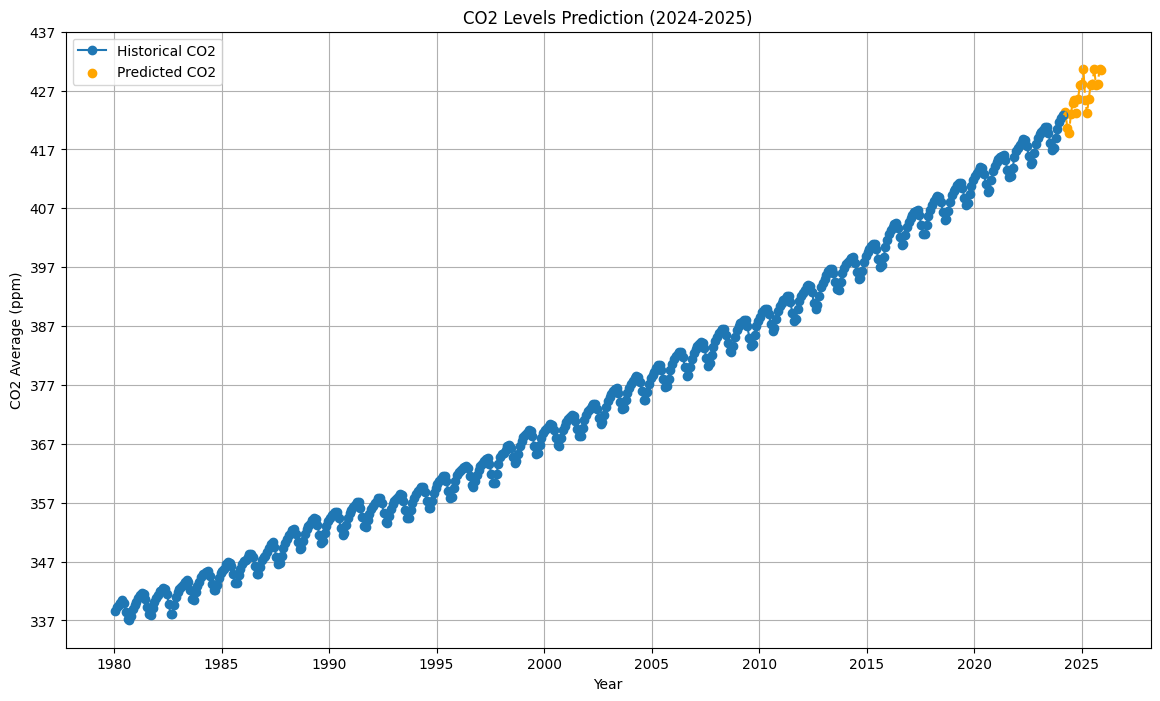

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define the Google Drive URL and load the data
co2_url = 'https://drive.google.com/uc?export=download&id=1kfmETp9mxkgKB8lXbGg3k-CKxwKG-zCl'
co2_df = pd.read_csv(co2_url)

print("\nCO2 Data Columns:", co2_df.columns)

# Define the data cleaning function
def clean_co2_data(df, filename):
    df.columns = df.columns.str.strip()
    print("\nColumns after stripping:", df.columns)
    df = df[['year', 'month', 'decimal', 'average', 'average_unc', 'trend', 'trend_unc']]
    missing_values = df.isnull().sum()
    print("Missing values:\n", missing_values)
    df['average'] = df['average'].interpolate(method='linear', limit_direction='both')
    df['trend'] = df['trend'].interpolate(method='linear', limit_direction='both')
    Q1 = df['average'].quantile(0.25)
    Q3 = df['average'].quantile(0.75)
    IQR = Q3 - Q1
    average_outliers_index = df[(df['average'] < (Q1 - 1.5 * IQR)) | (df['average'] > (Q3 + 1.5 * IQR))].index
    trimmed_df = df.drop(average_outliers_index)
    original_shape = df.shape
    trimmed_shape = trimmed_df.shape
    print("Original dataset shape:", original_shape)
    print("Trimmed dataset shape:", trimmed_shape)

    # Save the cleaned DataFrame to a CSV file
    trimmed_df.to_csv(filename, index=False)
    print(f"Cleaned data saved to {filename}")

    return trimmed_df

# Clean the CO2 data and save it
print("Cleaning CO2 Data:")
cleaned_co2_df = clean_co2_data(co2_df, 'cleaned_co2_data.csv')
print(cleaned_co2_df.head())

# Create lagged features
def create_lagged_features(df, lag=12):
    df = df.copy()
    df['lagged_average'] = df['average'].shift(lag)
    df = df.dropna()
    return df

cleaned_co2_df = create_lagged_features(cleaned_co2_df, lag=12)

# Prepare data for linear regression
X = cleaned_co2_df[['year', 'month', 'lagged_average']]
y = cleaned_co2_df['average']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
r2_score = model.score(X_test, y_test)
print(f"Linear Regression R² Score: {r2_score}")

# Predict future values (March 2024 - 2025)
future_years = [2024, 2025]
future_months = list(range(3, 13)) + list(range(1, 13))  # March to December 2024 and all of 2025
future_dates = pd.DataFrame({'year': np.repeat(future_years, 12)[2:], 'month': future_months})

# Initialize lagged values with the last 12 months from the historical data
last_12_months = cleaned_co2_df[-12:]['average'].values

# Generate predictions
predictions = []
for i in range(len(future_dates)):
    future_dates.at[i, 'lagged_average'] = last_12_months[i % 12]
    prediction = model.predict(future_dates.iloc[[i]][['year', 'month', 'lagged_average']])[0]
    predictions.append(prediction)
    last_12_months = np.append(last_12_months[1:], prediction)

future_dates['predicted_average'] = predictions

# Print predictions
for _, row in future_dates.iterrows():
    month = row['month']
    year = int(row['year'])
    predicted_value = round(row['predicted_average'], 2)
    print(f"{year} - {month}: {predicted_value} ppm")

# Plot the predictions
plt.figure(figsize=(14, 8))
plt.plot(cleaned_co2_df['decimal'], cleaned_co2_df['average'], label='Historical CO2', marker='o')
future_dates['decimal'] = future_dates['year'] + (future_dates['month'] - 1) / 12.0
plt.scatter(future_dates['decimal'], future_dates['predicted_average'], label='Predicted CO2', color='orange')
plt.plot(future_dates['decimal'], future_dates['predicted_average'], linestyle='--', color='orange')
plt.title('CO2 Levels Prediction (2024-2025)')
plt.xlabel('Year')
plt.ylabel('CO2 Average (ppm)')
plt.xticks(np.arange(int(cleaned_co2_df['year'].min()), int(future_dates['year'].max()) + 1, 5))
plt.yticks(np.arange(int(cleaned_co2_df['average'].min()), int(future_dates['predicted_average'].max()) + 10, 10))
plt.legend()
plt.grid(True)
plt.show()




**COMBINING CLEANED CO2 AND N/S AREA FILES + REMOVING YEARS THAT DONT MATCH UP**

In [ ]:
import pandas as pd

# Load the cleaned data files with correct paths
co2_df = pd.read_csv('/content/cleaned_co2_data.csv')
north_pole_df = pd.read_csv('/content/cleaned_north_pole_data.csv')
south_pole_df = pd.read_csv('/content/cleaned_south_pole_data.csv')

# Align column names for consistency
north_pole_df = north_pole_df.rename(columns={'mo': 'month', 'area': 'north_pole_area'})
south_pole_df = south_pole_df.rename(columns={'mo': 'month', 'area': 'south_pole_area'})
co2_df = co2_df.rename(columns={'average': 'average_co2'})

# Merge the DataFrames
combined_df = pd.merge(co2_df, north_pole_df, on=['year', 'month'], how='outer')
combined_df = pd.merge(combined_df, south_pole_df, on=['year', 'month'], how='outer')

# Reorder columns to match the desired structure
combined_df = combined_df[['year', 'month', 'decimal', 'north_pole_area', 'south_pole_area',
                           'average_co2', 'average_unc', 'trend', 'trend_unc']]

# Save the final combined DataFrame to a new CSV file
combined_df.to_csv('/content/final_combined_data.csv', index=False)

cleaned_df = combined_df[:-4]

cleaned_df.to_csv('/content/final_combined_data.csv', index=False)

cleaned_df.tail(10)


,year,month,decimal,north_pole_area,south_pole_area,average_co2,average_unc,trend,trend_unc
532,2023,5,2023.375,11.02,6.45,420.77,0.1,419.15,0.06
533,2023,6,2023.458,8.71,8.49,419.76,0.1,419.24,0.06
534,2023,7,2023.542,5.54,10.59,418.09,0.1,419.43,0.06
535,2023,8,2023.625,3.52,12.21,416.93,0.1,419.78,0.06
536,2023,9,2023.708,2.79,12.97,417.32,0.1,420.15,0.06
537,2023,10,2023.792,4.86,12.46,418.98,0.1,420.50,0.06
538,2023,11,2023.875,8.30,10.29,420.53,0.1,420.71,0.06
539,2023,12,2023.958,10.31,5.84,421.68,0.1,421.04,0.06
540,2024,1,2024.042,12.19,2.56,422.40,0.1,421.29,0.06
541,2024,2,2024.125,12.73,1.51,422.86,0.1,421.47,0.06


DATA PREDICTION USING SARIMAX NO

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score, mean_squared_error

# Load cleaned data
combined_df = pd.read_csv('/content/final_combined_heatcontent_data.csv')

# Fill missing values using linear interpolation
combined_df['north_pole_area'] = combined_df['north_pole_area'].interpolate(method='linear')
combined_df['south_pole_area'] = combined_df['south_pole_area'].interpolate(method='linear')
combined_df['average_co2'] = combined_df['average_co2'].interpolate(method='linear')
combined_df['WO'] = combined_df['WO'].interpolate(method='linear')
combined_df['NH'] = combined_df['NH'].interpolate(method='linear')
combined_df['SH'] = combined_df['SH'].interpolate(method='linear')

# Separate the variables
north_pole_ts = combined_df.set_index('decimal')['north_pole_area']
south_pole_ts = combined_df.set_index('decimal')['south_pole_area']

# Define exogenous variables
exog_vars = combined_df[['decimal', 'average_co2', 'WO', 'NH', 'SH']].set_index('decimal')

# Align indices
north_pole_ts, exog_vars = north_pole_ts.align(exog_vars, join='inner')
south_pole_ts, exog_vars = south_pole_ts.align(exog_vars, join='inner')

# Split data into training and testing sets (using last 2 years as test set)
train_north_pole_ts = north_pole_ts[:'2021']
test_north_pole_ts = north_pole_ts['2022':]
train_south_pole_ts = south_pole_ts[:'2021']
test_south_pole_ts = south_pole_ts['2022':]
train_exog = exog_vars[:'2021']
test_exog = exog_vars['2022':]

# Train SARIMAX model for North Pole
sarimax_order = (5, 1, 0)
seasonal_order = (1, 1, 1, 12)
model_north = SARIMAX(train_north_pole_ts, order=sarimax_order, seasonal_order=seasonal_order, exog=train_exog)
model_north_fit = model_north.fit(disp=False)

# Train SARIMAX model for South Pole
model_south = SARIMAX(train_south_pole_ts, order=sarimax_order, seasonal_order=seasonal_order, exog=train_exog)
model_south_fit = model_south.fit(disp=False)

# Make predictions on the test set
forecast_north_test = model_north_fit.get_forecast(steps=len(test_north_pole_ts), exog=test_exog).predicted_mean
forecast_south_test = model_south_fit.get_forecast(steps=len(test_south_pole_ts), exog=test_exog).predicted_mean

# Calculate R² score and MSE for North Pole
north_pole_r2 = r2_score(test_north_pole_ts, forecast_north_test)
north_pole_mse = mean_squared_error(test_north_pole_ts, forecast_north_test)

# Calculate R² score and MSE for South Pole
south_pole_r2 = r2_score(test_south_pole_ts, forecast_south_test)
south_pole_mse = mean_squared_error(test_south_pole_ts, forecast_south_test)

# Print R² score and MSE for North and South Pole with more precision
print(f"North Pole R² Score: {north_pole_r2:.6f}")
print(f"North Pole Mean Squared Error: {north_pole_mse:.6f}")
print(f"South Pole R² Score: {south_pole_r2:.6f}")
print(f"South Pole Mean Squared Error: {south_pole_mse:.6f}")

# Prepare future exogenous variables for prediction
future_steps = 22  # Number of future months (March 2024 to December 2025)
future_exog_co2 = np.linspace(combined_df['average_co2'].iloc[-1], combined_df['average_co2'].iloc[-1] + 5, future_steps)
future_exog_wo = np.linspace(combined_df['WO'].iloc[-1], combined_df['WO'].iloc[-1] + 0.5, future_steps)
future_exog_nh = np.linspace(combined_df['NH'].iloc[-1], combined_df['NH'].iloc[-1] + 0.5, future_steps)
future_exog_sh = np.linspace(combined_df['SH'].iloc[-1], combined_df['SH'].iloc[-1] + 0.5, future_steps)
future_exog = np.column_stack((future_exog_co2, future_exog_wo, future_exog_nh, future_exog_sh))

# Forecast for future dates
forecast_north = model_north_fit.get_forecast(steps=future_steps, exog=future_exog).predicted_mean
forecast_south = model_south_fit.get_forecast(steps=future_steps, exog=future_exog).predicted_mean

# Prepare future dates for plotting and printing
future_years = np.array([2024, 2025])
future_months = np.tile(np.arange(1, 13), len(future_years))
future_years = np.repeat(future_years, 12)
future_dates = pd.DataFrame({'year': future_years, 'month': future_months})
future_dates = future_dates[(future_dates['year'] > 2024) | (future_dates['month'] >= 3)]
future_dates = future_dates[:future_steps]
future_dates['decimal'] = future_dates['year'] + (future_dates['month'] - 1) / 12

# Ensure forecast arrays are correctly aligned with future_dates
forecast_north = forecast_north[:len(future_dates)]
forecast_south = forecast_south[:len(future_dates)]

# Print predicted values
print("\nPredicted Ice Area for North and South Poles (March 2024 to December 2025):")
for i in range(len(future_dates)):
    print(f"Year: {future_dates.iloc[i]['year']}, Month: {future_dates.iloc[i]['month']}, "
          f"North Pole Area Prediction: {forecast_north.iloc[i]:.2f}, South Pole Area Prediction: {forecast_south.iloc[i]:.2f}")

# Plot results
plt.figure(figsize=(14, 8))

# North Pole predictions
plt.subplot(2, 1, 1)
plt.plot(north_pole_ts, label='Historical North Pole Area', marker='o', color='blue')
plt.plot(future_dates['decimal'], forecast_north, label='Predicted North Pole Area', marker='o', linestyle='--', color='orange')
plt.xlabel('Year')
plt.ylabel('North Pole Ice Area (in millions of square kilometers)')
plt.title('North Pole Ice Area Prediction using SARIMAX (March 2024-Dec 2025)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(int(combined_df['year'].min()), 2026, 5))  # Spacing out x-axis ticks
plt.yticks(np.arange(int(combined_df['north_pole_area'].min()), int(combined_df['north_pole_area'].max()+1), 1))  # Spacing out y-axis ticks

# South Pole predictions
plt.subplot(2, 1, 2)
plt.plot(south_pole_ts, label='Historical South Pole Area', marker='o', color='purple')
plt.plot(future_dates['decimal'], forecast_south, label='Predicted South Pole Area', marker='o', linestyle='--', color='orange')
plt.xlabel('Year')
plt.ylabel('South Pole Ice Area (in millions of square kilometers)')
plt.title('South Pole Ice Area Prediction using SARIMAX (March 2024-Dec 2025)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(int(combined_df['year'].min()), 2026, 5))  # Spacing out x-axis ticks
plt.yticks(np.arange(int(combined_df['south_pole_area'].min()), int(combined_df['south_pole_area'].max()+1), 1))  # Spacing out y-axis ticks

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/final_combined_heatcontent_data.csv'

**PREDICTION USING PROPHET**



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpll6dlfvo/mmz8rwbg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpll6dlfvo/o_26dphp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48434', 'data', 'file=/tmp/tmpll6dlfvo/mmz8rwbg.json', 'init=/tmp/tmpll6dlfvo/o_26dphp.json', 'output', 'file=/tmp/tmpll6dlfvo/prophet_modelo3pt31re/prophet_model-20240613060506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:05:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:05:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

North Pole R² Score: 0.983659
North Pole Mean Squared Error: 0.173733
South Pole R² Score: 0.988808
South Pole Mean Squared Error: 0.238100


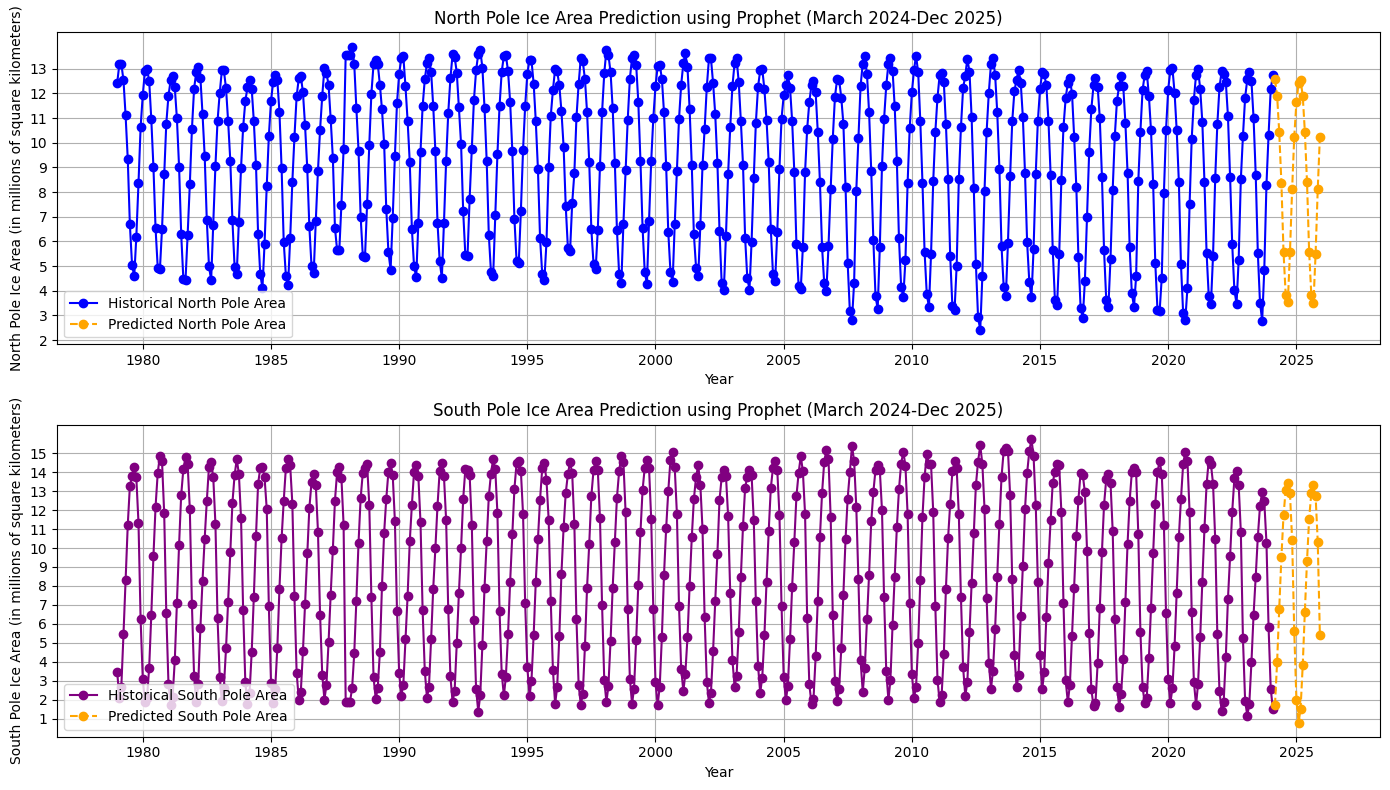

<ipython-input-21-562205a56fe1>:134: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', len(predicted_north_pole_df_2024_2025))


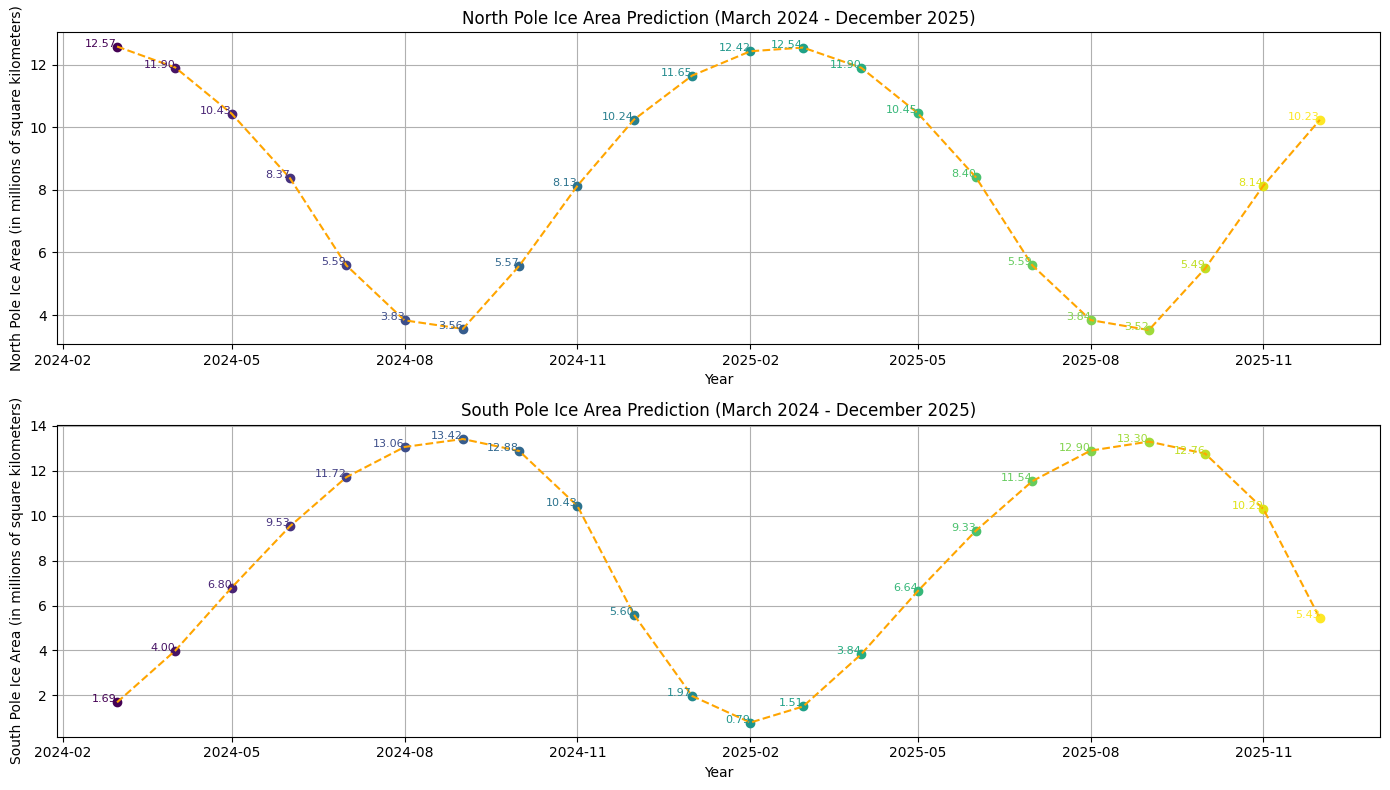

Predicted Ice Area for North and South Poles (March 2024 to December 2025):
Year: 2024.0, Month: 3.0, North Pole Area Prediction: 12.57, South Pole Area Prediction: 1.69
Year: 2024.0, Month: 4.0, North Pole Area Prediction: 11.90, South Pole Area Prediction: 4.00
Year: 2024.0, Month: 5.0, North Pole Area Prediction: 10.43, South Pole Area Prediction: 6.80
Year: 2024.0, Month: 6.0, North Pole Area Prediction: 8.37, South Pole Area Prediction: 9.53
Year: 2024.0, Month: 7.0, North Pole Area Prediction: 5.59, South Pole Area Prediction: 11.72
Year: 2024.0, Month: 8.0, North Pole Area Prediction: 3.83, South Pole Area Prediction: 13.06
Year: 2024.0, Month: 9.0, North Pole Area Prediction: 3.56, South Pole Area Prediction: 13.42
Year: 2024.0, Month: 10.0, North Pole Area Prediction: 5.57, South Pole Area Prediction: 12.88
Year: 2024.0, Month: 11.0, North Pole Area Prediction: 8.13, South Pole Area Prediction: 10.43
Year: 2024.0, Month: 12.0, North Pole Area Prediction: 10.24, South Pole Area

In [ ]:
import numpy as np
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import r2_score, mean_squared_error

# Load your data
file_path = '/content/final_combined_heatcontent_data.csv'
data = pd.read_csv(file_path)

# Select the relevant columns
selected_features = ['year', 'month', 'north_pole_area', 'south_pole_area', 'average_co2', 'WO', 'NH', 'SH']

# Prepare the data for Prophet
data['date'] = pd.to_datetime(data[['year', 'month']].assign(day=1))

# Create DataFrame for each feature
features = ['average_co2', 'WO', 'NH', 'SH']
feature_dfs = {feature: data[['date', feature]].rename(columns={'date': 'ds', feature: 'y'}) for feature in features}

# Train Prophet models for each feature and predict future values
future_dates = pd.DataFrame({
    'year': [2024] * 10 + [2025] * 12,
    'month': list(range(3, 13)) + list(range(1, 13))
})
future_dates['date'] = pd.to_datetime(future_dates[['year', 'month']].assign(day=1))
future_dates = future_dates[['date']].rename(columns={'date': 'ds'})

predicted_features = {}
for feature in features:
    model = Prophet()
    model.fit(feature_dfs[feature])
    forecast = model.predict(future_dates)
    predicted_features[feature] = forecast[['ds', 'yhat']].rename(columns={'yhat': feature})

# Combine predicted features with future_dates
future_data = future_dates.copy()
for feature in features:
    future_data[feature] = predicted_features[feature][feature].values

# Prepare the data for ice area prediction using the predicted features
north_pole_df = data[['date', 'north_pole_area', 'average_co2', 'WO', 'NH', 'SH']].rename(columns={'date': 'ds', 'north_pole_area': 'y'})
south_pole_df = data[['date', 'south_pole_area', 'average_co2', 'WO', 'NH', 'SH']].rename(columns={'date': 'ds', 'south_pole_area': 'y'})

# Train the Prophet model for the North Pole
north_pole_model = Prophet()
north_pole_model.add_regressor('average_co2')
north_pole_model.add_regressor('WO')
north_pole_model.add_regressor('NH')
north_pole_model.add_regressor('SH')
north_pole_model.fit(north_pole_df)

# Train the Prophet model for the South Pole
south_pole_model = Prophet()
south_pole_model.add_regressor('average_co2')
south_pole_model.add_regressor('WO')
south_pole_model.add_regressor('NH')
south_pole_model.add_regressor('SH')
south_pole_model.fit(south_pole_df)

# Make predictions on the test set
north_pole_test_forecast = north_pole_model.predict(north_pole_df)
south_pole_test_forecast = south_pole_model.predict(south_pole_df)

# Calculate R² score and MSE for North Pole
north_pole_r2 = r2_score(north_pole_df['y'], north_pole_test_forecast['yhat'])
north_pole_mse = mean_squared_error(north_pole_df['y'], north_pole_test_forecast['yhat'])

# Calculate R² score and MSE for South Pole
south_pole_r2 = r2_score(south_pole_df['y'], south_pole_test_forecast['yhat'])
south_pole_mse = mean_squared_error(south_pole_df['y'], south_pole_test_forecast['yhat'])

# Print R² score and MSE for North and South Pole
print(f"North Pole R² Score: {north_pole_r2:.6f}")
print(f"North Pole Mean Squared Error: {north_pole_mse:.6f}")
print(f"South Pole R² Score: {south_pole_r2:.6f}")
print(f"South Pole Mean Squared Error: {south_pole_mse:.6f}")

# Predict future ice areas for the North Pole
north_pole_forecast = north_pole_model.predict(future_data)

# Predict future ice areas for the South Pole
south_pole_forecast = south_pole_model.predict(future_data)

# Combine historical and predicted data
combined_north_pole_df = pd.concat([north_pole_df[['ds', 'y']], future_data[['ds']].assign(y=north_pole_forecast['yhat'])])
combined_south_pole_df = pd.concat([south_pole_df[['ds', 'y']], future_data[['ds']].assign(y=south_pole_forecast['yhat'])])

# Separate historical and predicted data for plotting
historical_north_pole_df = north_pole_df[['ds', 'y']]
predicted_north_pole_df = future_data[['ds']].assign(y=north_pole_forecast['yhat'])
historical_south_pole_df = south_pole_df[['ds', 'y']]
predicted_south_pole_df = future_data[['ds']].assign(y=south_pole_forecast['yhat'])

# Plot the results for North Pole
plt.figure(figsize=(14, 8))

# North Pole predictions
plt.subplot(2, 1, 1)
plt.plot(historical_north_pole_df['ds'], historical_north_pole_df['y'], label='Historical North Pole Area', marker='o', color='blue')
plt.plot(predicted_north_pole_df['ds'], predicted_north_pole_df['y'], label='Predicted North Pole Area', marker='o', linestyle='--', color='orange')
plt.xlabel('Year')
plt.ylabel('North Pole Ice Area (in millions of square kilometers)')
plt.title('North Pole Ice Area Prediction using Prophet (March 2024-Dec 2025)')
plt.legend(loc='lower left')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Spacing out x-axis ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formatting x-axis ticks to show only the year
plt.yticks(np.arange(int(data['north_pole_area'].min()), int(data['north_pole_area'].max()+1), 1))  # Spacing out y-axis ticks

# South Pole predictions
plt.subplot(2, 1, 2)
plt.plot(historical_south_pole_df['ds'], historical_south_pole_df['y'], label='Historical South Pole Area', marker='o', color='purple')
plt.plot(predicted_south_pole_df['ds'], predicted_south_pole_df['y'], label='Predicted South Pole Area', marker='o', linestyle='--', color='orange')
plt.xlabel('Year')
plt.ylabel('South Pole Ice Area (in millions of square kilometers)')
plt.title('South Pole Ice Area Prediction using Prophet (March 2024-Dec 2025)')
plt.legend(loc='lower left')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Spacing out x-axis ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formatting x-axis ticks to show only the year
plt.yticks(np.arange(int(data['south_pole_area'].min()), int(data['south_pole_area'].max()+1), 1))  # Spacing out y-axis ticks

plt.tight_layout()
plt.show()

# Filter predicted data for the period from March 2024 to December 2025
predicted_north_pole_df_2024_2025 = predicted_north_pole_df[(predicted_north_pole_df['ds'] >= '2024-03-01') & (predicted_north_pole_df['ds'] <= '2025-12-31')]
predicted_south_pole_df_2024_2025 = predicted_south_pole_df[(predicted_south_pole_df['ds'] >= '2024-03-01') & (predicted_south_pole_df['ds'] <= '2025-12-31')]

# Plotting only the predicted data for the period March 2024 to December 2025
plt.figure(figsize=(14, 8))

# North Pole predictions
plt.subplot(2, 1, 1)
plt.plot(predicted_north_pole_df_2024_2025['ds'], predicted_north_pole_df_2024_2025['y'], label='Predicted North Pole Area', marker='o', linestyle='--', color='orange')
plt.xlabel('Year')
plt.ylabel('North Pole Ice Area (in millions of square kilometers)')
plt.title('North Pole Ice Area Prediction (March 2024 - December 2025)')
plt.legend(loc='lower left')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# South Pole predictions
plt.subplot(2, 1, 2)
plt.plot(predicted_south_pole_df_2024_2025['ds'], predicted_south_pole_df_2024_2025['y'], label='Predicted South Pole Area', marker='o', linestyle='--', color='orange')
plt.xlabel('Year')
plt.ylabel('South Pole Ice Area (in millions of square kilometers)')
plt.title('South Pole Ice Area Prediction (March 2024 - December 2025)')
plt.legend(loc='lower left')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.show()
# Print predicted values for North and South Pole
print("Predicted Ice Area for North and South Poles (March 2024 to December 2025):")
for i in range(len(predicted_north_pole_df)):
    year = predicted_north_pole_df.iloc[i]['ds'].year
    month = predicted_north_pole_df.iloc[i]['ds'].month
    north_pole_area = predicted_north_pole_df.iloc[i]['y']
    south_pole_area = predicted_south_pole_df.iloc[i]['y']
    print(f"Year: {year:.1f}, Month: {month:.1f}, North Pole Area Prediction: {north_pole_area:.2f}, South Pole Area Prediction: {south_pole_area:.2f}")


**Linear Interpolate Combined Data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the combined data
combined_df = pd.read_csv('/content/cleaned_final_combined_data.csv')

# Identify rows with missing values
rows_with_missing_values = combined_df[combined_df.isnull().any(axis=1)]

# Display the rows with missing values
print("Rows with missing values before interpolation:")
print(rows_with_missing_values)

# Fill missing values using linear interpolation
combined_df['north_pole_area'] = combined_df['north_pole_area'].interpolate(method='linear')
combined_df['south_pole_area'] = combined_df['south_pole_area'].interpolate(method='linear')
combined_df['average_co2'] = combined_df['average_co2'].interpolate(method='linear')
combined_df['average_unc'] = combined_df['average_unc'].interpolate(method='linear')
combined_df['trend'] = combined_df['trend'].interpolate(method='linear')
combined_df['trend_unc'] = combined_df['trend_unc'].interpolate(method='linear')

# Check for any remaining missing values after interpolation
remaining_missing_values = combined_df[combined_df.isnull().any(axis=1)]
print("Remaining missing values after interpolation:")
print(remaining_missing_values)

# Resave dataframe to same file
combined_df.to_csv('/content/cleaned_final_combined_data.csv', index=False)

# Confirm
print("Cleaned data saved to 'cleaned_final_combined_data.csv'")

FileNotFoundError: [Errno 2] No such file or directory: '/content/cleaned_final_combined_data.csv'

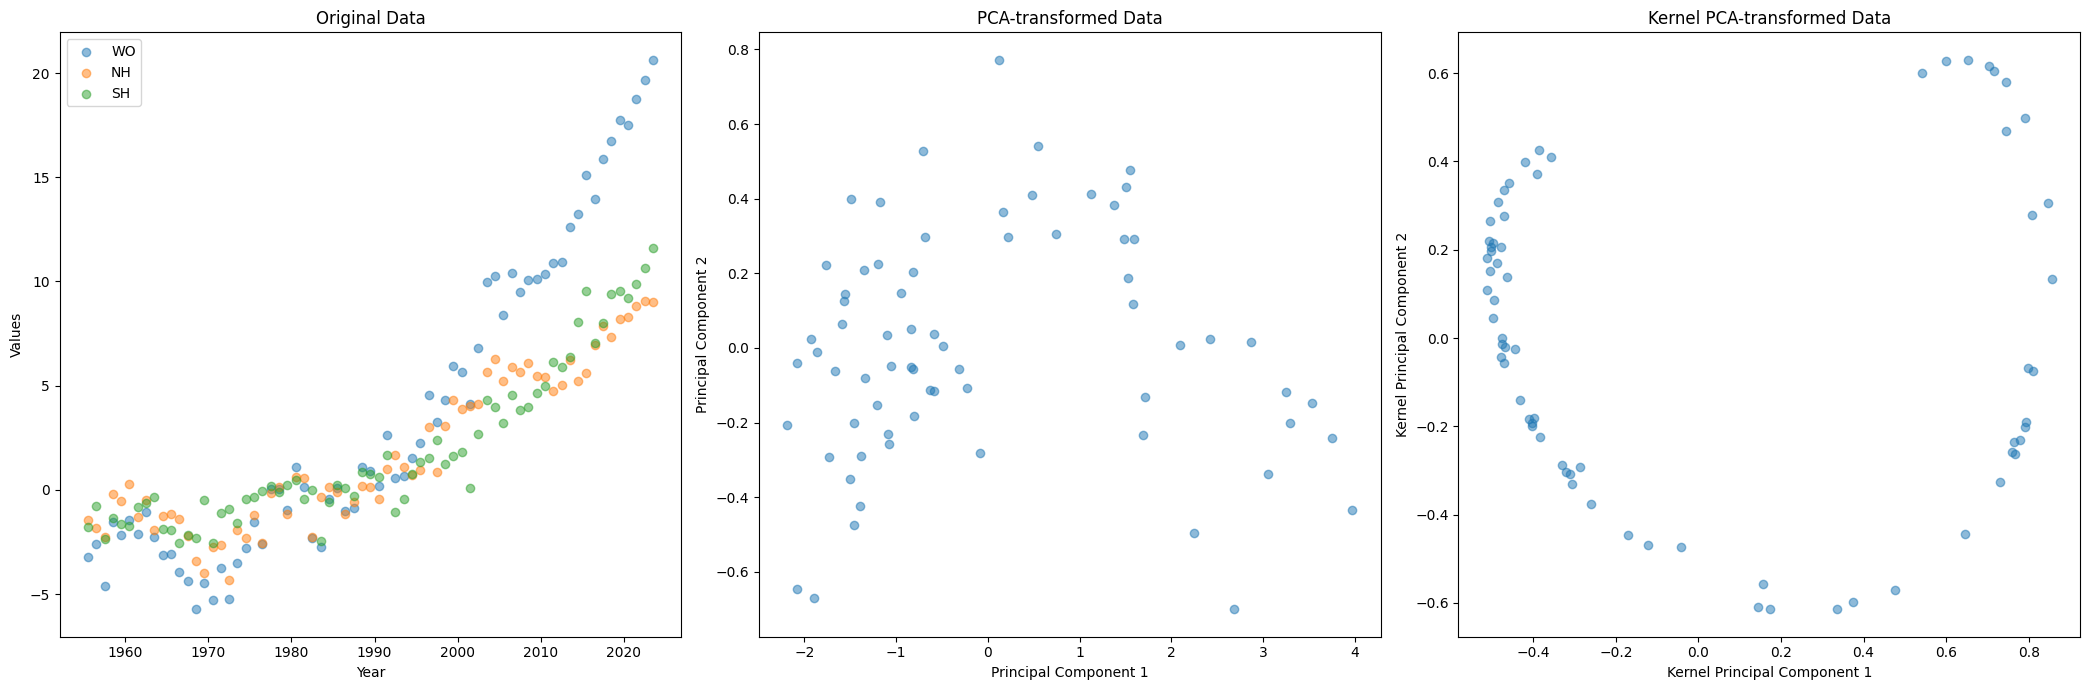

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

# Loads data
data = {
    'YEAR': [1955.5, 1956.5, 1957.5, 1958.5, 1959.5, 1960.5, 1961.5, 1962.5, 1963.5, 1964.5,
             1965.5, 1966.5, 1967.5, 1968.5, 1969.5, 1970.5, 1971.5, 1972.5, 1973.5, 1974.5,
             1975.5, 1976.5, 1977.5, 1978.5, 1979.5, 1980.5, 1981.5, 1982.5, 1983.5, 1984.5,
             1985.5, 1986.5, 1987.5, 1988.5, 1989.5, 1990.5, 1991.5, 1992.5, 1993.5, 1994.5,
             1995.5, 1996.5, 1997.5, 1998.5, 1999.5, 2000.5, 2001.5, 2002.5, 2003.5, 2004.5,
             2005.5, 2006.5, 2007.5, 2008.5, 2009.5, 2010.5, 2011.5, 2012.5, 2013.5, 2014.5,
             2015.5, 2016.5, 2017.5, 2018.5, 2019.5, 2020.5, 2021.5, 2022.5, 2023.5],
    'WO': [-3.201, -2.608, -4.613, -1.533, -2.189, -1.442, -2.115, -1.075, -2.272, -3.121,
           -3.060, -3.944, -4.361, -5.728, -4.481, -5.298, -3.767, -5.239, -3.519, -2.775,
           -1.551, -2.603, 0.032, 0.052, -0.96, 1.091, 0.122, -2.306, -2.763, -0.459,
           0.11, -1.037, -0.893, 1.088, 0.903, 0.177, 2.646, 0.572, 0.684, 1.51, 2.264,
           4.544, 3.245, 4.304, 5.943, 5.672, 4.117, 6.789, 9.952, 10.24, 8.412,
           10.43, 9.478, 10.052, 10.126, 10.367, 10.869, 10.941, 12.601, 13.261, 15.122,
           13.972, 15.878, 16.722, 17.726, 17.524, 18.735, 19.687, 20.637],
    'NH': [-1.439, -1.843, -2.242, -0.19, -0.554, 0.295, -1.282, -0.468, -1.911, -1.232,
           -1.157, -1.383, -2.207, -3.395, -4.01, -2.745, -2.656, -4.314, -1.925, -2.323,
           -1.196, -2.566, -0.147, 0.133, -1.177, 0.61, 0.572, -2.279, -0.332, 0.135,
           -0.119, -1.143, -0.596, 0.21, 0.125, -0.418, 0.993, 1.651, 1.1, 0.734, 0.942,
           3.002, 0.834, 3.061, 4.336, 3.857, 4.045, 4.129, 5.656, 6.286, 5.218,
           5.892, 5.661, 6.072, 5.463, 5.402, 4.726, 5.024, 6.217, 5.207, 5.587,
           6.93, 7.852, 7.332, 8.188, 8.314, 8.833, 9.055, 9.009],
    'SH': [-1.762, -0.765, -2.371, -1.343, -1.636, -1.737, -0.833, -0.607, -0.361, -1.89,
           -1.903, -2.56, -2.154, -2.333, -0.471, -2.553, -1.111, -0.925, -1.594, -0.452,
           -0.355, -0.037, 0.179, -0.081, 0.217, 0.48, -0.45, -0.027, -2.431, -0.594,
           0.229, 0.106, -0.297, 0.878, 0.778, 0.596, 1.652, -1.079, -0.416, 0.776,
           1.322, 1.542, 2.411, 1.243, 1.607, 1.815, 0.071, 2.66, 4.295, 3.955,
           3.194, 4.538, 3.818, 3.98, 4.663, 4.965, 6.144, 5.917, 6.384, 8.053,
           9.534, 7.043, 8.026, 9.389, 9.537, 9.21, 9.902, 10.632, 11.628]
}

df = pd.DataFrame(data)
df.set_index('YEAR', inplace=True)

# Standardizes data
features = df.columns
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Applies PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Applies Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
kernelPrincipalComponents = kernel_pca.fit_transform(x)
kernelPrincipalDf = pd.DataFrame(data=kernelPrincipalComponents, columns=['KPC1', 'KPC2'])

# Visualize
plt.figure(figsize=(21, 7))

# Original Data
plt.subplot(1, 3, 1)
plt.scatter(df.index, df['WO'], label='WO', alpha=0.5)
plt.scatter(df.index, df['NH'], label='NH', alpha=0.5)
plt.scatter(df.index, df['SH'], label='SH', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Original Data')
plt.legend()

# After PCA
plt.subplot(1, 3, 2)
plt.scatter(principalDf['PC1'], principalDf['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA-transformed Data')

# After Kernel PCA
plt.subplot(1, 3, 3)
plt.scatter(kernelPrincipalDf['KPC1'], kernelPrincipalDf['KPC2'], alpha=0.5)
plt.xlabel('Kernel Principal Component 1')
plt.ylabel('Kernel Principal Component 2')
plt.title('Kernel PCA-transformed Data')

plt.tight_layout()
plt.show()


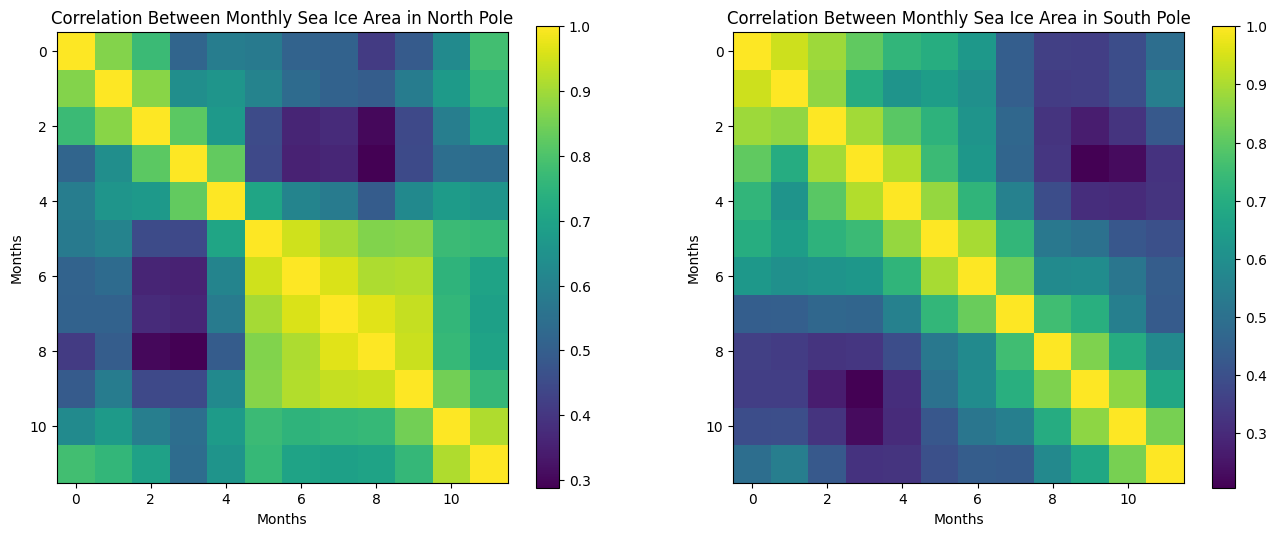

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Rearrange data to where rows are years and cols are months
data_pivot_N = cleaned_north_pole_df.pivot(index='year', columns = 'mo', values='area')
#print(data_pivot_N.head())
data_pivot_S = cleaned_south_pole_df.pivot(index='year', columns='mo', values='area')

# Find the correlation
area_corr_N = data_pivot_N.corr()
area_corr_S = data_pivot_S.corr()

# Plot the correlations for the poles
plt.subplots(1, 2, figsize=(16,6))

plt.subplot(1, 2, 1)
plt.imshow(area_corr_N)
plt.colorbar()

plt.xlabel('Months')
plt.ylabel('Months')
plt.title("Correlation Between Monthly Sea Ice Area in North Pole")

plt.subplot(1, 2, 2)
plt.imshow(area_corr_S)
plt.colorbar()

plt.xlabel('Months')
plt.ylabel('Months')
plt.title("Correlation Between Monthly Sea Ice Area in South Pole")
plt.show()

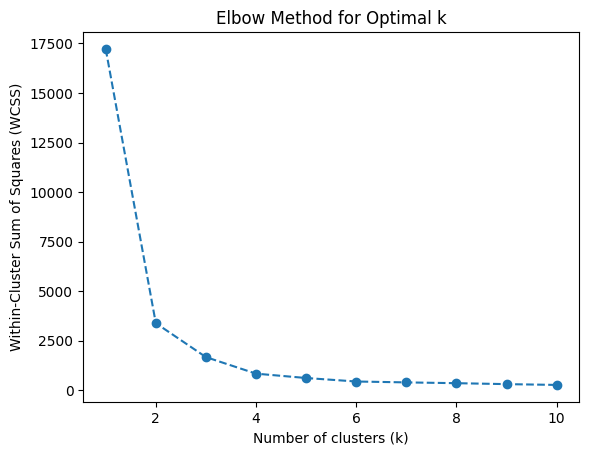

<Figure size 640x480 with 0 Axes>

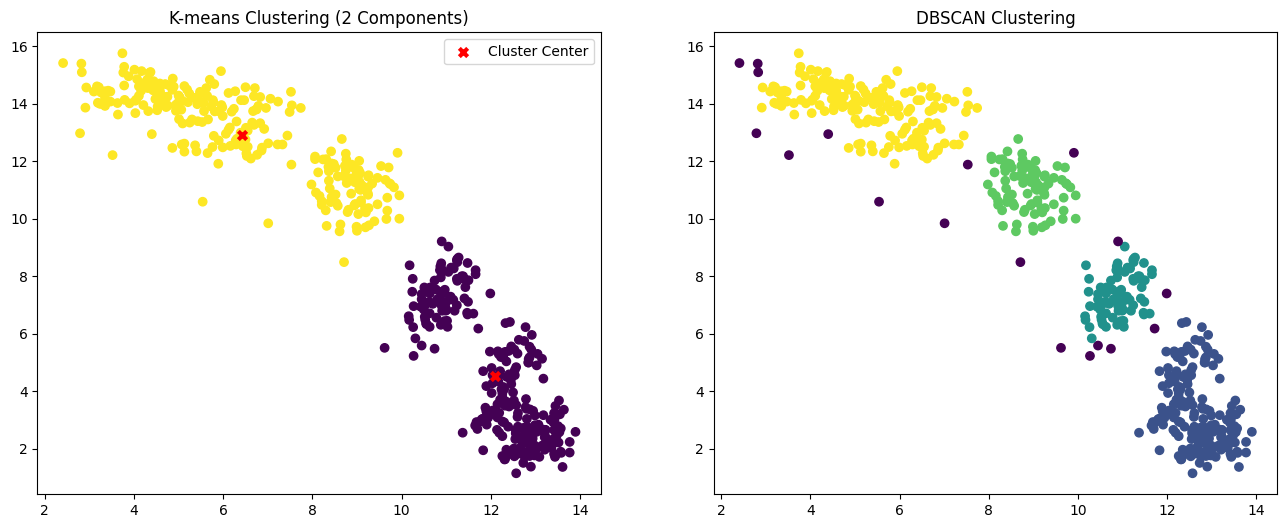

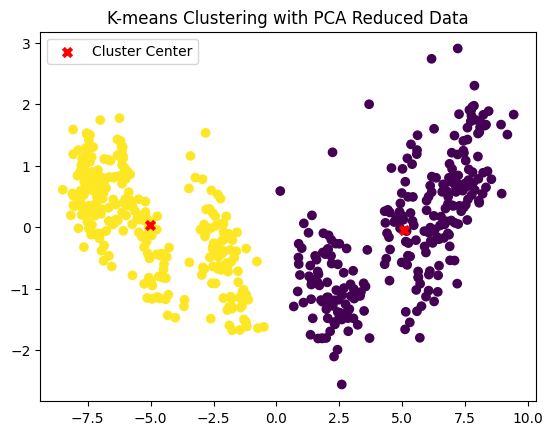

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, FeatureAgglomeration, DBSCAN
from sklearn import model_selection, decomposition

# Concat south pole areas to north pole area data (4 features: year, mo, north_area, south_area)
merged_df = pd.concat([cleaned_north_pole_df.rename(columns={'area':'north_area'}), cleaned_south_pole_df.rename(columns={'area':'south_area'}).south_area], axis=1)
# Remove last row of NAs
merged_df.drop([327], inplace=True)

# WCSS calculations to find the elbow point for k-means
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=4)
    kmeans.fit(merged_df.loc[:, 'north_area':'south_area'])
    wcss.append(kmeans.inertia_)
# Plot them to find the elbow point
plt.figure(1)
plt.plot(range(1, 11), wcss, 'o--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.show()
# We can see 2 clusters is best

# Do K-means and DBSCAN clustering (ignoring years and months features)
kmeans = KMeans(n_clusters=2, n_init=4).fit(merged_df.loc[:,'north_area':'south_area'])
dbscan = DBSCAN().fit(merged_df.loc[:,'north_area':'south_area'])

# Plot the resulting clusters, labels, and cluster centers
plt.figure(2)
plt.subplots(1, 2, figsize=(16,6))
X = np.array(merged_df.loc[:, 'north_area':'south_area'])

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_.astype(float))
clusters=kmeans.cluster_centers_
plt.scatter(clusters[:,0], clusters[:,1], marker='x', color='r', linewidth=3, label='Cluster Center')
plt.title("K-means Clustering (2 Components)")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_.astype(float))
plt.title("DBSCAN Clustering")
plt.show()


# K-means Clustering on PCA reduced data
# Reduce the data and fit it into kmeans clustering
reduced_data = decomposition.PCA(n_components=2).fit_transform(merged_df.loc[:,'north_area':'south_area'])
kmeans = KMeans(n_clusters=2, n_init=4)
kmeans.fit(reduced_data)

# Plot the clusters, labels, and cluster centers
plt.figure(3)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=kmeans.labels_.astype(float))
clusters = kmeans.cluster_centers_
plt.scatter(clusters[:,0], clusters[:,1], marker='x', color='r', linewidth=3, label='Cluster Center')
plt.title('K-means Clustering with PCA Reduced Data')
plt.legend()
plt.show()

**XGB MODEL PREDICTIONS**

Best parameters for North Pole model:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
North Pole R² Score: 0.990916
North Pole Mean Squared Error: 0.091484
Best parameters for South Pole model:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.6}
South Pole R² Score: 0.989016
South Pole Mean Squared Error: 0.220875


<Figure size 1000x600 with 0 Axes>

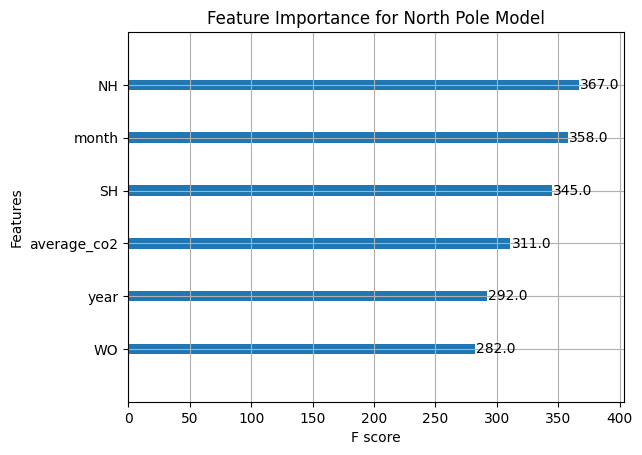

<Figure size 1000x600 with 0 Axes>

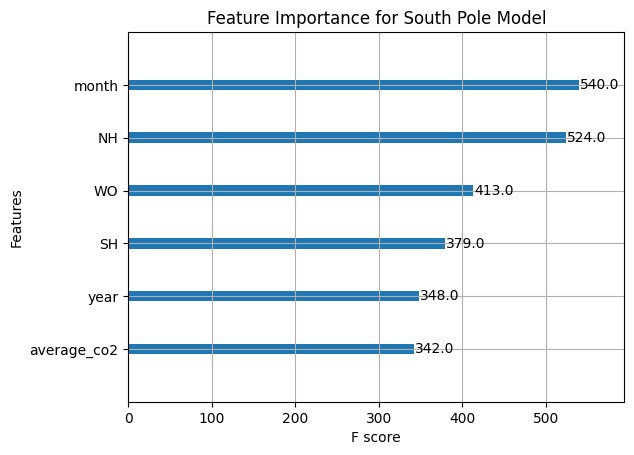

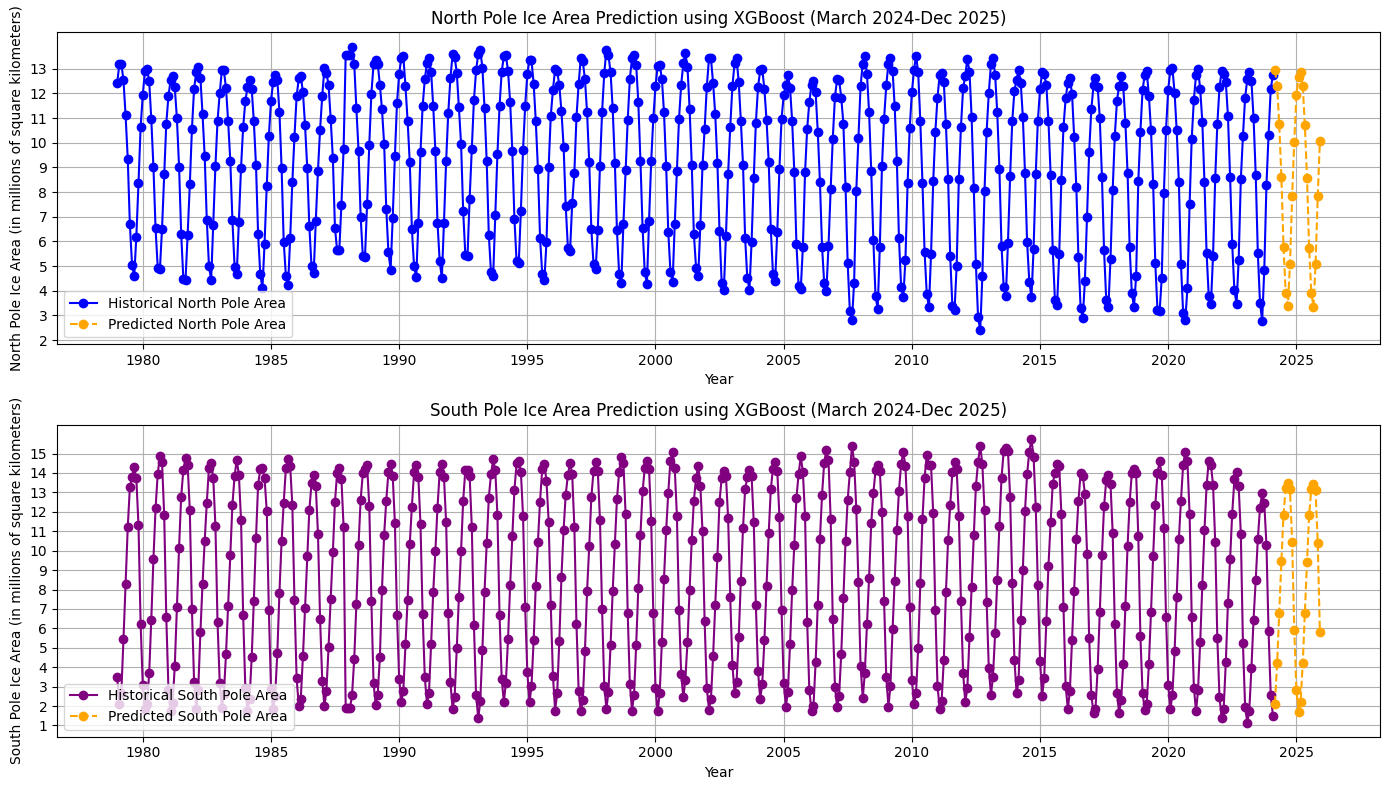

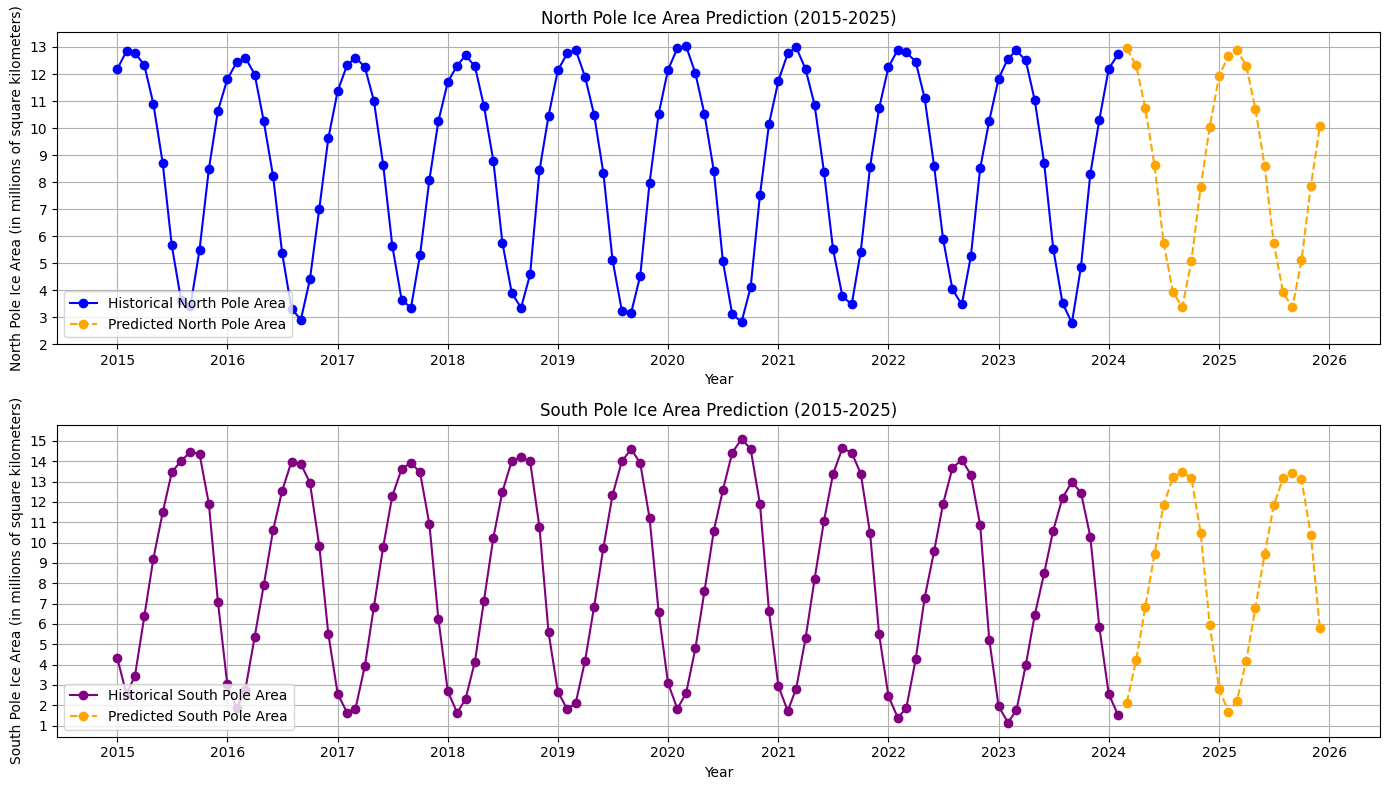

Predicted Ice Area for North and South Poles (March 2024 to December 2025):
Year: 2024.0, Month: 3.0, North Pole Area Prediction: 12.95, South Pole Area Prediction: 2.13
Year: 2024.0, Month: 4.0, North Pole Area Prediction: 12.32, South Pole Area Prediction: 4.23
Year: 2024.0, Month: 5.0, North Pole Area Prediction: 10.74, South Pole Area Prediction: 6.81
Year: 2024.0, Month: 6.0, North Pole Area Prediction: 8.61, South Pole Area Prediction: 9.46
Year: 2024.0, Month: 7.0, North Pole Area Prediction: 5.76, South Pole Area Prediction: 11.85
Year: 2024.0, Month: 8.0, North Pole Area Prediction: 3.93, South Pole Area Prediction: 13.20
Year: 2024.0, Month: 9.0, North Pole Area Prediction: 3.37, South Pole Area Prediction: 13.46
Year: 2024.0, Month: 10.0, North Pole Area Prediction: 5.07, South Pole Area Prediction: 13.18
Year: 2024.0, Month: 11.0, North Pole Area Prediction: 7.83, South Pole Area Prediction: 10.47
Year: 2024.0, Month: 12.0, North Pole Area Prediction: 10.04, South Pole Area

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV

#load data
file_path = '/content/final_combined_heatcontent_data.csv'
data = pd.read_csv(file_path)

#select features
selected_features = ['year', 'month', 'north_pole_area', 'south_pole_area', 'average_co2', 'WO', 'NH', 'SH']
data = data[selected_features]

#prepare the data
X = data[['year', 'month', 'average_co2', 'WO', 'NH', 'SH']]
y_north = data['north_pole_area']
y_south = data['south_pole_area']

#split the data into testing and training sets
X_train, X_test, y_north_train, y_north_test = train_test_split(X, y_north, test_size=0.2, random_state=42)
_, _, y_south_train, y_south_test = train_test_split(X, y_south, test_size=0.2, random_state=42)

#define the expanded parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400], #number of trees#
    'max_depth': [3, 5, 7, 9], #max tree depth#
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0], #fraction of samples used to fit the individual trees
    'colsample_bytree': [0.6, 0.8, 1.0] #fraction of features used to fir the individual trees
}

xgb_model = XGBRegressor(random_state=42) #initialize XGB model

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1) #grid search for hyperparameter tuning


grid_search.fit(X_train, y_north_train) # fit the GridSearchCV for NP
print("Best parameters for North Pole model: ", grid_search.best_params_)

# Use the best model to make predictions
best_model_north = grid_search.best_estimator_ #fetch best estimator
y_north_pred = best_model_north.predict(X_test) #make predictions

#eval
mse_north = mean_squared_error(y_north_test, y_north_pred) #calc mse
r2_north = r2_score(y_north_test, y_north_pred)  #calc r^2 score
print(f"North Pole R² Score: {r2_north:.6f}")
print(f"North Pole Mean Squared Error: {mse_north:.6f}")


grid_search.fit(X_train, y_south_train) # fit the GridSearchCV for SP
print("Best parameters for South Pole model: ", grid_search.best_params_)

# Use the best model to make predictions
best_model_south = grid_search.best_estimator_
y_south_pred = best_model_south.predict(X_test)

#eval
mse_south = mean_squared_error(y_south_test, y_south_pred) #calc mse
r2_south = r2_score(y_south_test, y_south_pred)#calc r^2 score
print(f"South Pole R² Score: {r2_south:.6f}")
print(f"South Pole Mean Squared Error: {mse_south:.6f}")

#plot feature importance for NP
plt.figure(figsize=(10, 6))
plot_importance(best_model_north)
plt.title('Feature Importance for North Pole Model')
plt.show()

#plot feature importance for SP
plt.figure(figsize=(10, 6))
plot_importance(best_model_south)
plt.title('Feature Importance for South Pole Model')
plt.show()

#prepare future data
future_dates = pd.DataFrame({
    'year': [2024] * 10 + [2025] * 12, #future years
    'month': list(range(3, 13)) + list(range(1, 13)) #future months
})
future_dates['date'] = pd.to_datetime(future_dates[['year', 'month']].assign(day=1))
future_data = future_dates[['year', 'month']].copy()

#we assume future co2 etc. follows a linear trend based on historical data
future_data['average_co2'] = np.linspace(data['average_co2'].iloc[-1], data['average_co2'].iloc[-1] + 2, len(future_dates)) #linear trend
future_data['WO'] = np.linspace(data['WO'].iloc[-1], data['WO'].iloc[-1] + 0.5, len(future_dates)) #linear trend
future_data['NH'] = np.linspace(data['NH'].iloc[-1], data['NH'].iloc[-1] + 0.5, len(future_dates)) #linear trend
future_data['SH'] = np.linspace(data['SH'].iloc[-1], data['SH'].iloc[-1] + 0.5, len(future_dates)) #linear trend

#predict future ice area given models
north_pole_forecast = best_model_north.predict(future_data)
south_pole_forecast = best_model_south.predict(future_data)

#combine historical and predicted data for plotting
combined_north_pole_df = pd.concat([data[['year', 'month', 'north_pole_area']].rename(columns={'north_pole_area': 'y'}), future_dates.assign(y=north_pole_forecast)])
combined_south_pole_df = pd.concat([data[['year', 'month', 'south_pole_area']].rename(columns={'south_pole_area': 'y'}), future_dates.assign(y=south_pole_forecast)])

# Separate historical and predicted data for plotting
historical_north_pole_df = data[['year', 'month', 'north_pole_area']].rename(columns={'north_pole_area': 'y'})
predicted_north_pole_df = future_dates.assign(y=north_pole_forecast)
historical_south_pole_df = data[['year', 'month', 'south_pole_area']].rename(columns={'south_pole_area': 'y'})
predicted_south_pole_df = future_dates.assign(y=south_pole_forecast)

#convert year and month for plotting
historical_north_pole_df['date'] = pd.to_datetime(historical_north_pole_df[['year', 'month']].assign(day=1))
predicted_north_pole_df['date'] = pd.to_datetime(predicted_north_pole_df[['year', 'month']].assign(day=1))
historical_south_pole_df['date'] = pd.to_datetime(historical_south_pole_df[['year', 'month']].assign(day=1))
predicted_south_pole_df['date'] = pd.to_datetime(predicted_south_pole_df[['year', 'month']].assign(day=1))

#plotting
plt.figure(figsize=(14, 8))

#NP
plt.subplot(2, 1, 1)
plt.plot(historical_north_pole_df['date'], historical_north_pole_df['y'], label='Historical North Pole Area', marker='o', color='blue')
plt.plot(predicted_north_pole_df['date'], predicted_north_pole_df['y'], label='Predicted North Pole Area', marker='o', linestyle='--', color='orange')
plt.xlabel('Year')
plt.ylabel('North Pole Ice Area (in millions of square kilometers)')
plt.title('North Pole Ice Area Prediction using XGBoost (March 2024-Dec 2025)')
plt.legend(loc='lower left')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.yticks(np.arange(int(data['north_pole_area'].min()), int(data['north_pole_area'].max()+1), 1))

#SP
plt.subplot(2, 1, 2)
plt.plot(historical_south_pole_df['date'], historical_south_pole_df['y'], label='Historical South Pole Area', marker='o', color='purple')
plt.plot(predicted_south_pole_df['date'], predicted_south_pole_df['y'], label='Predicted South Pole Area', marker='o', linestyle='--', color='orange')
plt.xlabel('Year')
plt.ylabel('South Pole Ice Area (in millions of square kilometers)')
plt.title('South Pole Ice Area Prediction using XGBoost (March 2024-Dec 2025)')
plt.legend(loc='lower left')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.yticks(np.arange(int(data['south_pole_area'].min()), int(data['south_pole_area'].max()+1), 1))

plt.tight_layout()
plt.show()

historical_north_pole_df_2015_2025 = historical_north_pole_df[(historical_north_pole_df['date'] >= '2015-01-01')]
historical_south_pole_df_2015_2025 = historical_south_pole_df[(historical_south_pole_df['date'] >= '2015-01-01')]

# Plotting for the period 2015 to 2025
plt.figure(figsize=(14, 8))

# North Pole
plt.subplot(2, 1, 1)
plt.plot(historical_north_pole_df_2015_2025['date'], historical_north_pole_df_2015_2025['y'], label='Historical North Pole Area', marker='o', color='blue')
plt.plot(predicted_north_pole_df['date'], predicted_north_pole_df['y'], label='Predicted North Pole Area', marker='o', linestyle='--', color='orange')
plt.xlabel('Year')
plt.ylabel('North Pole Ice Area (in millions of square kilometers)')
plt.title('North Pole Ice Area Prediction (2015-2025)')
plt.legend(loc='lower left')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.yticks(np.arange(int(historical_north_pole_df_2015_2025['y'].min()), int(historical_north_pole_df_2015_2025['y'].max()+1), 1))

# South Pole
plt.subplot(2, 1, 2)
plt.plot(historical_south_pole_df_2015_2025['date'], historical_south_pole_df_2015_2025['y'], label='Historical South Pole Area', marker='o', color='purple')
plt.plot(predicted_south_pole_df['date'], predicted_south_pole_df['y'], label='Predicted South Pole Area', marker='o', linestyle='--', color='orange')
plt.xlabel('Year')
plt.ylabel('South Pole Ice Area (in millions of square kilometers)')
plt.title('South Pole Ice Area Prediction (2015-2025)')
plt.legend(loc='lower left')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.yticks(np.arange(int(historical_south_pole_df_2015_2025['y'].min()), int(historical_south_pole_df_2015_2025['y'].max()+1), 1))

plt.tight_layout()
plt.show()


#print predicted values for NP and SP
print("Predicted Ice Area for North and South Poles (March 2024 to December 2025):")
for i in range(len(predicted_north_pole_df)):
    year = predicted_north_pole_df.iloc[i]['year']
    month = predicted_north_pole_df.iloc[i]['month']
    north_pole_area = predicted_north_pole_df.iloc[i]['y']
    south_pole_area = predicted_south_pole_df.iloc[i]['y']
    print(f"Year: {year:.1f}, Month: {month:.1f}, North Pole Area Prediction: {north_pole_area:.2f}, South Pole Area Prediction: {south_pole_area:.2f}")